# FORMULA 1 - 2022 SEASON ANALYSIS

## Created by Doğan Yiğit Yenigün (a.k.a. toUpperCase78)

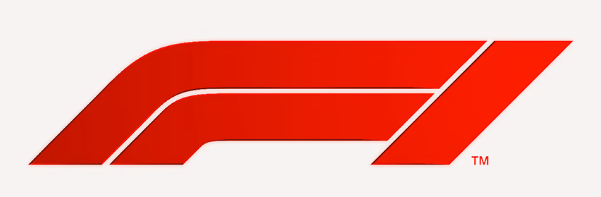

# Welcome to the Data Analysis of Formula 1 2022 Season!

New season, new cars; drivers are hunger for passion and glory, teams are waiting for showing their speed machines on the tracks, and we the fans are eager to watch the exciting scenes wherever possible... We're all welcome to the **73rd season** of Formula 1 history!

This season is the start of **the new era of F1 cars**: Designed specifically to allow closer racing, that is, to decrease the difference between the fastest and the slowest car on the grid. Then, reduction of 'dirty air' caused by the car in front to minimize the downforce loss for the car behind while racing so close. The addition of over-wheel winglets and wheel covers. Much bigger tyres (from 13-inch to 18-inch). The return of ground effects that was last used in the late 1970s. Rear wings now featuring 'rolled tips'. More sustainable fuel... But, what things these cars kept the same as previous season are **1.6-litre turbo-hybrid engine** and, of course, for drivers' safety, **the continuation of halo design** attached above the cabin as well as the capability of absorbing more energy against impacts.

On the other hand, these innovations caused a negative effect on these cars, called **porpoising**. In basic definition, this is the situation of bouncing up and down continuously while going fast on the straights, while this could be a big pain for drivers and the teams have not predicted that effect before during the initial development! One thing for sure is that any team which overcame the annoying porpoising issue will take the advantage for the championship with regards to aerodynamics.

Nonetheless, the 2022 Season is **a scintillating one**, in the way that lots of head-to-head battles have been witnessed by the spectators during the races, many laps have been completed for becoming the fastest to capture the pole positions and several mind-blowing, shocking or mesmerizing events occurred on and off the tracks! More importantly, one driver and one team was the happiest to take the crown at the end, and to tell the world their supremacy against opponents! That's why, these data analyses are here for gaining insights for what happened essentially from all angles possible.

**If you're ready to take a tour for what happened in 2022 Season of Formula 1, then let's put the five red lights out and away we go for the data analysis!**

As always, we start by importing the necessary libraries and reading all the corresponding carefully-crafted datasets below. In addition, there is a helper function that assigns the colors to drivers and teams appropriately, especially useful for data visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
%matplotlib inline
font_manager.fontManager.addfont('C:\\Users\\Doğan Yiğit Yenigün\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Formula1-Regular_web.ttf')

In [2]:
season2022RaceCalendar = pd.read_csv('Formula1_2022season_calendar.csv')
season2022RaceCalendar.set_index('Round', inplace=True)
season2022Drivers = pd.read_csv('Formula1_2022season_drivers.csv')
season2022Drivers.set_index('Abbreviation', inplace=True)
season2022Teams = pd.read_csv('Formula1_2022season_teams.csv')
season2022Teams.index = range(1,11)
season2022QualifyingResults = pd.read_csv('Formula1_2022season_qualifyingResults.csv')
season2022SprintRaceResults = pd.read_csv('Formula1_2022season_sprintRaceResults.csv')
season2022RaceResults = pd.read_csv('formula1_2022season_raceResults.csv')
season2022DotdVotes = pd.read_csv('formula1_2022season_driverOfTheDayVotes.csv')
season2022DotdVotes.set_index('Track', inplace=True)

In [3]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:           cl.append('#900000')
        elif abbr in ['HAAS','SCH','MAG']:         cl.append('#ffffff')
        elif abbr in ['ASTO','VET','STR','HUL']:   cl.append('#006f62')
        elif abbr in ['WILL','ALB','LAT','DE']:    cl.append('#0072ff')
        elif abbr in ['ALPH','GAS','TSU']:         cl.append('#2b5962')
        elif abbr in ['MCLA','RIC','NOR']:         cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00d2bd')
        elif abbr in ['ALPI','ALO','OCO']:         cl.append('#0090ff')
    return cl

## 2022 Season - Race Calendar

2022 Season race calendar was comprised of **22 races**, across **4 continents** and **20 countries**...

In [4]:
season2022RaceCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,20/03/2022,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,27/03/2022,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.774,Lewis Hamilton,2021,27,3
3,10/04/2022,Heineken Australian GP,Australia,Melbourne,Albert Park Circuit,1996,58,5.278,306.124,1:20.260,Charles Leclerc,2022,14,2
4,24/04/2022,Rolex Gran Premio Del Made in Italy e Dell'Emi...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,18,1
5,08/05/2022,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:31.361,Max Verstappen,2022,19,3
6,22/05/2022,Pirelli Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.675,308.424,1:18.149,Max Verstappen,2021,16,2
7,29/05/2022,Grand Prix de Monaco,Monaco,Monte Carlo,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,12/06/2022,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
9,19/06/2022,AWS Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2019,14,3


* From the table here, first of all, it is nice to see **Australia**, **Canada**, **Singapore** and **Japan** back in the calendar, after the difficult times of **Covid-19 pandemic** in the previous years.
* **China**, however, still did not make it due to the ongoing bad conditions caused by Covid-19 effects and thus, has been ruled out before the season started.
* **Jeddah Corniche Circuit** in Saudi Arabia, where the inaugural race was organized in 2021 as the penultimate one, was moved to become **the second race** in the calendar. That means all drivers and teams have raced twice in the same circuit in less than a year!
* **Miami International Autodrome** was the newest race track, having made its debut this season. It was another kind of street race circuit, containing the Hard Rock Stadium at is epicentre.
* **Catalunya Circuit** in Spain has its turn 10 changed slightly to make the cornering faster.
* **Albert Park Circuit** in Australia received a major overhaul for several turns, where the most notable one was for getting rid of the slow corners in the second sector, to increase the average speed and mutually, a few seconds faster lap times.

## 2022 Season - Teams

Similar to previous seasons, total of **10 teams** competed in the grid to be the best constructor in 2022 Season...

_(numbers on the right columns reflect the results after the completion of 2022 Season)_

In [5]:
season2022Teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB18,Red Bull Powertrains,1997,5,1(x92),81,84
2,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualtieri,F1-75,Ferrari,1950,16,1(x243),242,258
3,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W13,Mercedes,1970,8,1(x116),128,91
4,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Otmar Szafneuer,Pat Fry,A522,Renault,1986,2,1(x21),20,15
5,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL36,Mercedes,1966,8,1(x183),156,162
6,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C42,Ferrari,1993,0,1(x1),1,6
7,Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Crack,Andrew Green,AMR22,Mercedes,2018,0,1(x1),1,0
8,Haas,Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-22,Ferrari,2016,0,4(x1),1,2
9,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT03,Red Bull Powertrains,1985,0,1(x2),1,2
10,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW44,Mercedes,1978,9,1(x114),128,133


There are some noticeable livery changes for some teams compared to previous season:

* **Mercedes** team has returned back to their silver livery as the main color on the bodywork of their cars after using black ones mostly in 2020 and 2021 Season.
* **Alpine** added some pink colors, especially to their sidepods on their blue-themed cars, after BWT became their name sponsors.
* **Haas** launched their cars with some blue colors featured, due to their sponsors Uralkali; but ended the deal before the season has begun, because of the war between Russia and Ukraine. They continued with white, black and red later on.
* **Williams** had significant changes on their liveries to mostly contain energy blue color, no longer having white one.

## 2022 Season - Drivers

Together with the number of teams, total of **20 drivers** (plus 2 reserve drivers) were on the grid for the world championship in 2022 Season...

_(numbers on the corresponding columns reflect the results after the end of 2022 Season)_

In [6]:
season2022Drivers

,Driver,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
VER,Max Verstappen,1,Red Bull Racing,Netherlands,77,2011.5,163,2,1(x35),1,30/09/1997,"Hasselt,Belgium"
LEC,Charles Leclerc,16,Ferrari,Monaco,24,868.0,103,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
PER,Sergio Perez,11,Red Bull Racing,Mexico,26,1201.0,236,0,1(x4),1,26/01/1990,"Guadalajara, Mexico"
RUS,George Russell,63,Mercedes,United Kingdom,9,294.0,82,0,1(x1),1,15/02/1998,"King's Lynn, England"
SAI,Carlos Sainz,55,Ferrari,Spain,15,782.5,163,0,1(x1),1,01/09/1994,"Madrid, Spain"
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,191,4405.5,310,7,1(x103),1,07/01/1985,"Stevenage, England"
NOR,Lando Norris,4,McLaren,United Kingdom,6,428.0,82,0,2(x1),1,13/11/1999,"Bristol, England"
OCO,Esteban Ocon,31,Alpine,France,2,364.0,111,0,1(x1),3,17/09/1996,"Evreux, Normandy"
ALO,Fernando Alonso,14,Alpine,Spain,98,2061.0,358,2,1(x32),1,29/07/1981,"Oviedo, Spain"


Let's point out the remarkable driver changes compared to 2021:

* **George Russell** finally moved to Mercedes to become the teammate of 7-times world champion Lewis Hamilton. Remember that the British driver had had a race with the team once for the second Bahrain race in 2020.
* **Valtteri Bottas** departed from Mercedes team, after racing with them for five years in total and achieving multiple wins and podiums. The Finnish driver started a new chapter with Alfa Romeo for his career, where his compatriot Kimi Raikkönen retired from F1 just after the end of 2021 season in the same team.
* **Guanyu Zhou** was the newest driver in the grid, becoming the first ever Chinese driver in Formula 1 history and having a seat with Alfa Romeo as Bottas' teammate.
* **Alexander Albon** returned back to F1 to go racing for Williams, after the impact of Russell's move to Mercedes.
* Russian driver **Nikita Mazepin** would've continued with Haas, but his contract was terminated before the season started due to the war bursting out between Russia and Ukraine. Instead, **Kevin Magnussen**, who raced with the American team in previous seasons, has been called back.
* Two reserve drivers (Nyck De Vries & Nico Hulkenberg) have appeared in 2022 Season's grid. **De Vries** replaced Alexander Albon for Williams in Italy (Monza) GP, while **Hulkenberg** raced in Sebastian Vettel's place for Aston Martin in the first two races (Bahrain & Saudi Arabia).

## Several Notable Races in 2022 Season

Within the 22-race long 2022 Season, there were such race weekends that stood out more than other for intriguing, scary, or spectacular incidents. Here, I've chosen seven of them to remember what things have been coincided, including their top 10 race results...

### Gulf Air Bahrain Grand Prix 2022

In [7]:
season2022RaceResults[season2022RaceResults['Track'] == 'Bahrain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,1:35.740
3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,1:36.228
4,63,George Russell,Mercedes,9,57,+11.211,12,No,1:36.302
5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,1:36.623
6,77,Valtteri Bottas,Alfa Romeo Ferrari,6,57,+16.119,8,No,1:36.599
7,31,Esteban Ocon,Alpine Renault,11,57,+19.423,6,No,1:37.110
8,22,Yuki Tsunoda,AlphaTauri RBPT,16,57,+20.386,4,No,1:37.104
9,14,Fernando Alonso,Alpine Renault,8,57,+22.390,2,No,1:36.733


It was **the opening race** of the season. Until that weekend, nobody knew much about the capabilities of these new-era cars on the asphalt. So far, pre-season tests had been carried out on the same Bahrain circuit, but did not give clear ideas for which team had the fastest car. Therefore, we had to wait for the first Grand Prix of the season.

In the qualifying session, **Charles Leclerc took the pole position** where Max Verstappen claimed the second place for the front row start, then the other Ferrari driver Carlos Sainz stayed in the third. In addition, **Mercedes could not have the enough pace** against Red Bull and Ferrari cars unlike 2021 Season; as a result, Lewis Hamilton got the fifth place while his newcomer teammate George Russell settled ninth place.

During the race on Sunday, we've encountered **many wheel-to-wheel battles** between Leclerc and Verstappen for the leadership, especially in such corners where there were long straights beforehand; one driver got ahead of his rival, but a few corners later, the other driver retook the lead.

In the closing section of the race, however, **something was wrong with Verstappen's car** as he was slowing down on the track and the Dutchman got frustrated. Hence, he had nothing to do with that but to retire the car to the pits! After a short while, Checo Perez had a major issue with his car by spinning, then the engine power cut off immediately! Yes, that was a **double DNF** for Red Bull team, an ultimate disappointment for the start of the season! On the other hand, Ferrari team performed a perfect start **by winning the race with Leclerc** (including the fastest lap point) and second place with Sainz! Certainly, that was in Hamilton's favor to complete the podium and Russell's fourth place together were damage limitations for Mercedes team.

About the rest, the Haas driver **Kevin Magnussen** finished P5 astoundingly! Keep in mind that the American team could not score any points in 2021, thus this result was so meaningful that they made the right call to bring the Danish driver back to the grid with several points in the bag at the start. A stunning **Viking comeback**, wasn't it? Remarkably, the Chinese driver **Guanyu Zhou** successfully grabbed a championship point in his debut with Alfa Romeo.

**Race Highlights:** https://www.youtube.com/watch?v=wIYPuzWCCSw

### Crypto.com Miami Grand Prix 2022

In [8]:
season2022RaceResults[season2022RaceResults['Track'] == 'Miami'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,3,57,1:34:24.258,26,Yes,1:31.361
2,16,Charles Leclerc,Ferrari,1,57,+3.786,18,No,1:31.488
3,55,Carlos Sainz,Ferrari,2,57,+8.229,15,No,1:31.790
4,11,Sergio Perez,Red Bull Racing RBPT,4,57,+10.638,12,No,1:31.819
5,63,George Russell,Mercedes,12,57,+18.582,10,No,1:32.195
6,44,Lewis Hamilton,Mercedes,6,57,+21.368,8,No,1:32.941
7,77,Valtteri Bottas,Alfa Romeo Ferrari,5,57,+25.073,6,No,1:33.184
8,31,Esteban Ocon,Alpine Renault,20,57,+28.386,4,No,1:33.163
9,23,Alexander Albon,Williams Mercedes,18,57,+32.365,2,No,1:33.447


Let's move to the **the fifth race** of the season, the brand-new Miami Grand Prix. Another street circuit where Hard Rock Stadium resided in its epicenter. It was **another pole position earned by Charles Leclerc**, while his teammate Sainz arrived next to him for front row start, and both Red Bull drivers Verstappen and Perez settled down to the second row.

For Sunday's race, Verstappen seemd to be eager to acquire the lead and never looking back afterwards. He did so by overtaking Leclerc after a couple of laps later from the start, while Sergio Perez was seeking opportunities for passing both Ferraris wherever possible in the whole race.

**The most serious incident** was happened between Lando Norris and Pierre Gasly. In that one, the Frenchman turned a corner wide, but after re-joining the track, he banged his front left wheel with the Briton's rear right, causing him to spin around; then the tyre came off from the McLaren. It was such an unfortunate moment for Norris to be out of the race; several laps later, Gasly was forced to retire, perhaps because of the damage his car suffered from that incident or something else.

All in all, the inaugural Miami race was **won by Max Verstappen**, getting additional 26 points (so this includes the fastest lap point) to climb up to higher places in Drivers Standings, together with two Ferraris behind to complete the podium. Then, there were Mercedes drivers pursuing completing the race after the drivers from the top two teams.

**Race Highlights:** https://www.youtube.com/watch?v=Bixit7nxYE4

### Grand Prix de Monaco 2022

In [9]:
season2022RaceResults[season2022RaceResults['Track'] == 'Monaco'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing RBPT,3,64,1:56:30.265,25,No,1:16.028
2,55,Carlos Sainz,Ferrari,2,64,+1.154,18,No,1:16.421
3,1,Max Verstappen,Red Bull Racing RBPT,4,64,+1.491,15,No,1:16.052
4,16,Charles Leclerc,Ferrari,1,64,+2.922,12,No,1:16.249
5,63,George Russell,Mercedes,6,64,+11.968,10,No,1:16.830
6,4,Lando Norris,McLaren Mercedes,5,64,+12.231,9,Yes,1:14.693
7,14,Fernando Alonso,Alpine Renault,7,64,+46.358,6,No,1:15.882
8,44,Lewis Hamilton,Mercedes,8,64,+50.388,4,No,1:17.203
9,77,Valtteri Bottas,Alfa Romeo Ferrari,12,64,+52.525,2,No,1:17.600


As always, Monaco was **one of the prestigious and the oldest race circuit** for several decades. Although there were controveries that whether or not the ever-growing F1 cars (in the sense of their lengths) were still suitable for lapping around the narrow circuit, this place was attracting lots of people to the grandstands, hotels and even small or large boats to see the actions live every time for sure!

This season's Monaco race was **started with heavy rain** and all drivers began lapping behind the safety car, but as the rain still did not go away, later **the red flag** was waved because of the aquaplaning risk for all cars. The right moment has been chosen for racing when the rain was weakened and after major amount of water was swept away from the track surface. However, drivers should've been careful for driving on wet as there was no room for mistake for such a street circuit like this!

Perhaps, the breaking point of the race was the moments where Ferrari drivers got involved. Leclerc's first pit stop was for switching his full wet tyres to intermediate, as normal. A few laps later, Sainz and Leclerc made a double stack duty for their pit crews, as the Spaniard switched from wet to hard slick, and the Monegasque pitted for hard tyres by changing from intermediates. However, **there was a misconception over the radio**, because when Leclerc's race engineer said _'Stay out',_ it was too late for him to do that and he was forced for the pit. It was certain that his anger reflected to the radio by saying, _'Fuck! What the hell are you doing?'_ As a result, the Ferraris were the leading the race, but **handed over to Red Bull** after the pits from both teams!

Later, there was a frightening accident by Haas driver Mick Schumacher, where his car spun out near the swimming pool chicane and upon the impact to the barriers, **the car's rear end was split from the body** (that would cost a lot to the team definitely)!. Even Mick was all right after this incident, it was not a good day for the team as Magnussen was also DNF a short while ago.

In the last 15-20 laps of the race (where it was decided to finish under time limit instead of regular 78 laps), there were **close chases for all four Red Bull and Ferrari drivers** continuously, but it was not easy to perform an attack for overtaking in  a narrow street circuit. At the end, **Sergio Perez** successfully won the Grand Prix, getting his 3rd victory in his career in that day! For Charles Leclerc, he **finally completed a race in his own country** with 4th place and ended his curse for not seeing the chequered flag here during his career (even in the periods from Formula 2 and 3)! 

**Race Highlights:** https://www.youtube.com/watch?v=sp_ntF4GmSE

### Azerbaijan Grand Prix 2022

In [10]:
season2022RaceResults[season2022RaceResults['Track'] == 'Azerbaijan'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,3,51,1:34:05.941,25,No,1:46.050
2,11,Sergio Perez,Red Bull Racing RBPT,2,51,+20.823,19,Yes,1:46.046
3,63,George Russell,Mercedes,5,51,+45.995,15,No,1:47.177
4,44,Lewis Hamilton,Mercedes,7,51,+71.679,12,No,1:47.044
5,10,Pierre Gasly,AlphaTauri RBPT,6,51,+77.299,10,No,1:48.519
6,5,Sebastian Vettel,Aston Martin Aramco Mercedes,9,51,+84.099,8,No,1:48.206
7,14,Fernando Alonso,Alpine Renault,10,51,+88.596,6,No,1:47.989
8,3,Daniel Ricciardo,McLaren Mercedes,12,51,+92.207,4,No,1:48.276
9,4,Lando Norris,McLaren Mercedes,11,51,+92.556,2,No,1:47.997


Now, another street circuit for reminiscence; **Baku Street Circuit** with very long straight to the finish line and the tight chicane near the castle where any mistakes were not forgiven. The Saturday's qualifying session saw the occupations of top 4 by Ferrari and Red Bull drivers; starting with **Charles Leclerc's pole position**, Checo Perez was next to him in the front row, and Verstappen was behind the Ferrari, accompanied by Sainz in the second row.

After the lights were out in the race, Perez took the lead in the very first corner due to Leclerc's tyres becoming locked up. Several laps later, yellow flags were being waved in the first sector and it was **Carlos Sainz who parked in the escape zone**; the problem from his car seemed to appear from the power unit or gearbox. In the 20th lap, **white smokes were coming from Charles Leclerc's car** in the long straight because of engine failure! Well, that was 'game over' for the Prancing Horse for having double DNF there, even not completing the half distance of the 51-lap race! The only thing they had to do was to pack everything without waiting the for the Grand Prix to complete!

As the time progressed, **the problems continued for other Ferrari-powered teams** as well, such that Zhou from Alfa Romeo and Magnussen from Haas suffered major issues from their cars and they needed to pull to the side of the barriers or escape zones wherever possible.

Moreover, the interesting incident belonged to Yuki Tsunoda of AlphaTauri as **he got issues from the rear wing** when DRS could not be opened completely! Because the black and orange flag was waved at the Japanese, then he was forced to the pits for quick fix from the crew by **attaching duct tapes** on the wing (pretty uncommon thing, right?)!

All in all, it was **a perfect day** for Red Bull and **a comfortable win** by Max Verstappen, with his teammate Sergio Perez finishing second, thanks to the absence of their close rivals. The podium was completed by the young driver George Russell from Mercedes team.

**Race Highlights:** https://www.youtube.com/watch?v=9xCYKQXaK7A

### Lenovo British Grand Prix 2022

In [11]:
season2022RaceResults[season2022RaceResults['Track'] == 'Great Britain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,55,Carlos Sainz,Ferrari,1,52,2:17:50.311,25,No,1:30.813
2,11,Sergio Perez,Red Bull Racing RBPT,4,52,+3.779,18,No,1:30.937
3,44,Lewis Hamilton,Mercedes,5,52,+6.225,16,Yes,1:30.510
4,16,Charles Leclerc,Ferrari,3,52,+8.546,12,No,1:31.282
5,14,Fernando Alonso,Alpine Renault,7,52,+9.571,10,No,1:31.609
6,4,Lando Norris,McLaren Mercedes,6,52,+11.943,8,No,1:31.645
7,1,Max Verstappen,Red Bull Racing RBPT,2,52,+18.777,6,No,1:32.354
8,47,Mick Schumacher,Haas Ferrari,19,52,+18.995,4,No,1:32.109
9,5,Sebastian Vettel,Aston Martin Aramco Mercedes,18,52,+22.356,2,No,1:32.471


**The home of British motorsports.** Silverstone circuit often cherished people with thrilling battles between drivers on the track and year 2022 was one of them but... in unfavorable way at the start of the race.

On the first lap, everybody witnessed a tremendous crash just near the first corner such that **one car was travelling upside down** and went off the track at fast speed while George Russell was immediately out of the race! For that reason, it has been red-flagged without wasting more time.

Later, replays showed that the victim of this horrible accident was **Guanyu Zhou** from Alfa Romeo! It all began with Pierre Gasly where the Frenchman made contact with Russell's rear left tyre and the Briton lost control of the car at once, then crashed into Zhou with such a big impact that the Chinese driver was flipped over, and inside the car, he went to the barriers with scary fast speed (even the sand pool did not slow him down!), turned a somersault and stopped near the grandstands for a while! I can definitely say that we all were very frightened about him and thought **if he was badly injured and/or lost his conciousness!** Some time later, thanks to God we learned that he was able to walk away from that accident and saw him on foot, though he was needed to be taken to hospital for further medical care to make sure he was OK. Of course, this was all bypassed with very durable halo protection on the car and advancements to driver's safety.

Besides, **the first lap incident was not limited to that one**: There, Sebasitan Vettel crashed Alexander Albon from behind, sent him to the wall near the pit lane, then a few other drivers got affected negatively by contacting him, receiving tyre/suspension damage. However, they had all the damages repaired during the red-flag period, so they were able to attend to the grid again.

Thankfully, no more serious incidents occurred after the restart, and it was fine to observe many head-to-head battles between rivals, especially for becoming the race leader, for Red Bulls and Ferraris mostly. Several laps later, Verstappen **got slowed down a bit** due to receiving bodywork damage, but he was able to continue even bearing with the performance loss. To be honest, one of the best struggles was in the last laps of the race, such that while Perez and Leclerc were battling for the 2nd place,  Hamilton got the opportunity to pass them both near the chicane in the last sector! Admit it, you still have the commentator David Croft's astonishment in your mind, with his statement: _'Through goes Hamilton, unbelieveable stuff!'_ Yeah, these fierce battles continued until the last kilometers, even Fernando Alonso and Lando Norris got involved for getting the podium!

Despite all those things, the hero of the day was **Carlos Sainz** who started the race on pole position (it was his first at the time) and brought himself to the triumph by crossing the finish line in the first place! This was definitely **one of his smoothest operation** in his F1 career and we were happy for him to join to the Grand Prix winner's club! Vamos!

**Race Highlights:** https://www.youtube.com/watch?v=bM6ren2tPU8

### Honda Japanese Grand Prix 2022

In [12]:
season2022RaceResults[season2022RaceResults['Track'] == 'Japan'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,28,3:01:44.004,25,No,1:44.911
2,11,Sergio Perez,Red Bull Racing RBPT,4,28,+27.066,18,No,1:46.120
3,16,Charles Leclerc,Ferrari,2,28,+31.763,15,No,1:44.489
4,31,Esteban Ocon,Alpine Renault,5,28,+39.685,12,No,1:46.559
5,44,Lewis Hamilton,Mercedes,6,28,+40.326,10,No,1:45.530
6,5,Sebastian Vettel,Aston Martin Aramco Mercedes,9,28,+46.358,8,No,1:46.964
7,14,Fernando Alonso,Alpine Renault,7,28,+46.369,6,No,1:44.412
8,63,George Russell,Mercedes,8,28,+47.661,4,No,1:47.004
9,6,Nicholas Latifi,Williams Mercedes,19,28,+70.143,2,No,1:48.371


Now, heading to the Far East, **Suzuka Circuit in Japan**; the one with unique 8-shaped design and the very fast 130R corner.

The first four places of the grid were again derived from **both Red Bull and Ferrari drivers**. The championship leader Verstappen was on pole, Leclerc was in the front row near him; behind there were Sainz and Perez. At the same time, however, the heavy rain had fallen down on the track, forcing all drivers to use full wet tyres; we were wondering if everyone could survive in the first couple of laps.

Well, unfortunately, **Carlos Sainz was the first one** being out of the race without completing a lap! Another driver was Alexander Albon who got issues on his car within the opening lap. Then, Sebastian Vettel who spun out due to a contact with Alonso before the first corner, but was able to continue afterwards. Similarly, Zhou who also got spun near the hairpin of the track. Furthermore, Pierre Gasly got caught by cardboard in the front of his car, interestingly.

After all these incidents, Safety Car deployment to the track was inevitable to bring all the cars safely to the pit lane, because it was the right decision to bring out **the red flag** at that moment. Additionally, it was not possible for the drivers to see what was going on at far distance because of the continuity of the heavy rain and large amount of water spraying caused by the tyres during the first lap of the race. Thus, we all **waited for more than an hour** until the rain was stopped and the danger of aquaplaning was eliminated.

Luckily then, it was worthwhile to see F1 actions again when the conditions were suitable for racing (but, from that moment on it was not possible to apply the full length, so the race itself was **converted to time limit**). Upon restart, all drivers with full wet tyres were pitted for intermediate tyres; but even with these swaps, the water spraying continued which was still risky for any driver who were chasing their rivals ahead so close!

When the time ran out, Verstappen was already in the lead by over 20 seconds, and it was **another comfortable race win** for him. Speaking of the battle for 2nd place, Leclerc and Perez did the best efforts to outperform each other until they both crossed the finish line. However, the Monegasque driver cut the corner in the last chicane while he was ahead, and Perez behind complained about him over the radio for leaving the track and gaining advantage. As expected, Leclerc received 5-second time penalty after the race, causing him to drop down to 3rd place.

With the conclusion of the race, although we thought less points could be awarded to the drivers who completed in top 10 because the race lasted total of **28 laps which was between 50% and 75% distance**, FIA later decided to give full points as usual, pointing out the reason that the race was resumed after red flag. After all these consequences, **Max Verstappen became 2022 Season champion of the world**; the second time in his career! It was also eloquent for Red Bull's engine supplier Honda, for having their driver earned the title in their home race, even though the name appeared as RBPT (Red Bull PowerTrain).

**Race Highlights:** https://www.youtube.com/watch?v=0J7cmh3MLp4

### Heineken Gran Premio de Sao Paulo 2022

In [13]:
season2022RaceResults[season2022RaceResults['Track'] == 'Brazil'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,63,George Russell,Mercedes,1,71,1:38:34.044,26,Yes,1:13.785
2,44,Lewis Hamilton,Mercedes,2,71,+1.529,18,No,1:13.942
3,55,Carlos Sainz,Ferrari,7,71,+4.051,15,No,1:13.953
4,16,Charles Leclerc,Ferrari,5,71,+8.441,12,No,1:14.253
5,14,Fernando Alonso,Alpine Renault,17,71,+9.561,10,No,1:14.164
6,1,Max Verstappen,Red Bull Racing RBPT,3,71,+10.056,8,No,1:14.195
7,11,Sergio Perez,Red Bull Racing RBPT,4,71,+14.080,6,No,1:14.283
8,31,Esteban Ocon,Alpine Renault,16,71,+18.690,4,No,1:15.093
9,77,Valtteri Bottas,Alfa Romeo Ferrari,14,71,+22.552,2,No,1:15.511


Lastly, let's have a talk about Brazil (actually called Sao Paulo GP), **the penultimate race** of the season.

In that race weekend, **there was Sprint race** available and George Russell from Mercedes did an exceptional job for taking the 1st place in the short race format (details below); a great start from the young British before the main race on Sunday.

Moving to 71-lap long race, Russell was in the front, while his veteran teammate Hamilton was next to him and already champion Vestappen was in third (Carlos Sainz could've been in 2nd but received 5-place grid penalty in advance).

In the very first lap, Daniel Ricciardo made a contact with Kevin Magnussen who got the pole position in Qualifying then grabbed a point in Sprint race (details below). His spin later caused another contact with the Australian, **ended both their races** all of a sudden! It was a pity for the Danish driver for completing the weekend like it was a nightmare!

After the safety car period for removing the damaged cars out of the track and cleaning the debris, more contacts between drivers lied down. For instance, 2021 Season's big heroes, **Hamilton and Verstappen collided each other**; causing the Briton to move in off-track for a while, then the Dutch driver received 5-second time penalty. Another incident was happened by **Norris touching Leclerc**, causing him to spin and hitting the barriers; but luckily enough his race wasn't over. These brought some excitements for whether or not the affected drivers could climb up through places throughout the race, after they were forced to pit for repairs.

Within the last several laps, the **Mercedes drivers were ahead of the race** with Russell in the lead and Hamilton coming after, with the gap being not much. While Russell wanted to take his first victory in his F1 career, Hamilton by the way was willing to get another win in the track he was so successful in the past. However, the young British driver defended his leadership against 7-time world champion until the end; as a result, Russell in the first season with Mercedes, took the chequered flag in first, won the Sao Paulo GP; becoming **the newest Grand Prix winner** at that time! Yeah, it was absolutely wonderful for him to be on top of the podium, plus the only 1-2 finish Mercedes accomplished among the full season.

**Race Highlights:** https://www.youtube.com/watch?v=sG0rVJT_MT0

## 2022 Season - Sprint Races

Sprint races are the new additions of F1 race weekend structure, first introduced in 2021 Season. In such weekends where this kind of race is available, qualifying session is carried out **on Friday** to determine the starting grid of the sprint race that is implemented **on Saturday** and also the award for pole position.

Note that the distances of sprint races are roughly **one third** of a Sunday's race session (in other words, a little more than **100 km**) and it's not mandatory to pit in for changing tyres for another compound. The main purpose of these races are to **shuffle the grid** a bit more by racing on the track to prepare all drivers and teams for the real Grand Prix race on Sunday. Moreover, the top 8 drivers can earn additional championship points, where **the winner of the sprint race gets 8 points**, going down one by one to **1 point for the driver finishing eighth**, instead of just top 3 finishers in 2021 Season.

Below you can see the top 10 results of all sprint races occurred in 2022. Total of three sprint races have been organized in **Imola (Emilia Romagna)**, **Austria** and **Brazil**, respectively:

### Emilia Romagna (Imola)

In [14]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Emilia Romagna'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,21,30:39.567,8
2,16,Charles Leclerc,Ferrari,2,21,+2.975,7
3,11,Sergio Perez,Red Bull Racing RBPT,7,21,+4.721,6
4,55,Carlos Sainz,Ferrari,10,21,+17.578,5
5,4,Lando Norris,McLaren Mercedes,3,21,+24.561,4
6,3,Daniel Ricciardo,McLaren Mercedes,6,21,+27.740,3
7,77,Valtteri Bottas,Alfa Romeo Ferrari,8,21,+28.133,2
8,20,Kevin Magnussen,Haas Ferrari,4,21,+30.712,1
9,14,Fernando Alonso,Alpine Renault,5,21,+32.278,0


### Austria

In [15]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Austria'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,23,26:30.059,8
2,16,Charles Leclerc,Ferrari,2,23,+1.675,7
3,55,Carlos Sainz,Ferrari,3,23,+5.644,6
4,63,George Russell,Mercedes,4,23,+13.429,5
5,11,Sergio Perez,Red Bull Racing RBPT,13,23,+18.302,4
6,31,Esteban Ocon,Alpine Renault,5,23,+31.032,3
7,20,Kevin Magnussen,Haas Ferrari,6,23,+34.539,2
8,44,Lewis Hamilton,Mercedes,9,23,+35.447,1
9,47,Mick Schumacher,Haas Ferrari,7,23,+37.163,0


### Brazil

In [16]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Brazil'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,63,George Russell,Mercedes,3,24,30:11.307,8
2,55,Carlos Sainz,Ferrari,5,24,+3.995,7
3,44,Lewis Hamilton,Mercedes,8,24,+4.492,6
4,1,Max Verstappen,Red Bull Racing RBPT,2,24,+10.494,5
5,11,Sergio Perez,Red Bull Racing RBPT,9,24,+11.855,4
6,16,Charles Leclerc,Ferrari,10,24,+13.133,3
7,4,Lando Norris,McLaren Mercedes,4,24,+25.624,2
8,20,Kevin Magnussen,Haas Ferrari,1,24,+28.768,1
9,5,Sebastian Vettel,Aston Martin Aramco Mercedes,13,24,+30.218,0


So, what can we imply from the results of all these sprint races?

* Definitely, **Max Verstappen** took the chequered flag in the 1st place at Imola and Austria. Plus, the Dutch driver started these short races on pole position! **George Russell** was the other driver who snatched the win in Brazil.
* It seemed that the Ferrari drivers **Leclerc** and **Sainz** had consistent finishes in these three races overall although they did not get any wins.
* **Kevin Magnussen** started the Brazil sprint at the front, after a very exciting qualifying session (details below), but his pace with Haas wasn't enough for him to hold that position; at least finished 8th for a single point, though.
* From these results, **Sainz** climbed up the most places in Imola sprint **(+6)**; **Perez** performed the most overtakes than anyone else in Austria sprint **(+8)**, and **Hamilton** gained up to **5** positions thanks to Brazil sprint. 
* In contrast, **Magnussen** and **Alonso** dropped down **4** places in Imola sprint; **Schumacher** lost **2** places in Austria sprint, putting him away from the points and, as explained above, **Magnussen** was affected in the worst shape in Brazil sprint by going down **7** places.

## 2022 Season - Driver Standings

When we sum all the drivers' championship points collected for 2022 Season, what kind of Driver Standings table are we going to encounter? Of course, the answer is found below:

In [17]:
racePoints = season2022RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintRacePoints = season2022SprintRaceResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for driver in season2022RaceResults['Driver'].unique():
    if driver not in season2022SprintRaceResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0
driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings['POS'] = range(1,23)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
driverStandings

,Driver,Team,Points
POS,,,
1,Max Verstappen,Red Bull Racing RBPT,454
2,Charles Leclerc,Ferrari,308
3,Sergio Perez,Red Bull Racing RBPT,305
4,George Russell,Mercedes,275
5,Carlos Sainz,Ferrari,246
6,Lewis Hamilton,Mercedes,240
7,Lando Norris,McLaren Mercedes,122
8,Esteban Ocon,Alpine Renault,92
9,Fernando Alonso,Alpine Renault,81


Wow! We can state that Max Verstappen reached the 2022 Season championship title **by over 100 points** compared to Charles Leclerc and teammate Sergio Perez! Against all odds, the Monegasque driver had the consolation by at least finishing 2nd in the standings.

In the meantime, George Russell experienced a great first season with Mercedes team, by scoring over 200 points and surprisingly, he's successfully **beaten the 7-time world champion** Lewis Hamilton! Between these two drivers, Carlos Sainz penetrated through, which does not seem bad at all, in terms of earned points.

**Lando Norris** came after the top teams' drivers and he was the only one who scored more than 100 points among the rest of the drivers! His teammate, however, Daniel Ricciardo got significantly behind, finished the season with 37 points, which was roughly one third of the Briton's.

Speaking of Alpine drivers, the Frenchman Esteban Ocon **outperformed his veteren teammate** Fernando Alonso after 22 races, which should be a substantial feat for him!

Hamilton's previous teammate **Valtteri Bottas** completed the top 10. The other driver with world championship title, **Sebastian Vettel**, accumulated 37 points and finished 12th in his second season with Aston Martin.

Furthermore, Mick Schumacher **has met with points** this season; grabbed a total of 12 points in two different locations (Great Britain & Austria). At the same time, Guanyu Zhou, the first Chinese driver in F1 history, completed the season with only 6 points.

## Points Progression of Top 10 Drivers Throughout The Season

So, after all these comments, did you wonder how the drivers progressed through all of these races in 2022 Season? Surely, it will be a perfect time to represent a visual for this purpose, including drivers finished in the standings top 10, to give us a better idea:

In [18]:
driverStandingsTop10 = driverStandings['Driver'][:10].values
driverPointsTop10 = {};  driverPointsTop10Sprint = {}
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = season2022RaceResults[season2022RaceResults['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = season2022SprintRaceResults[season2022SprintRaceResults['Driver'] == driver] \
        ['Points'].values
sp = [3, 10, 20]
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]

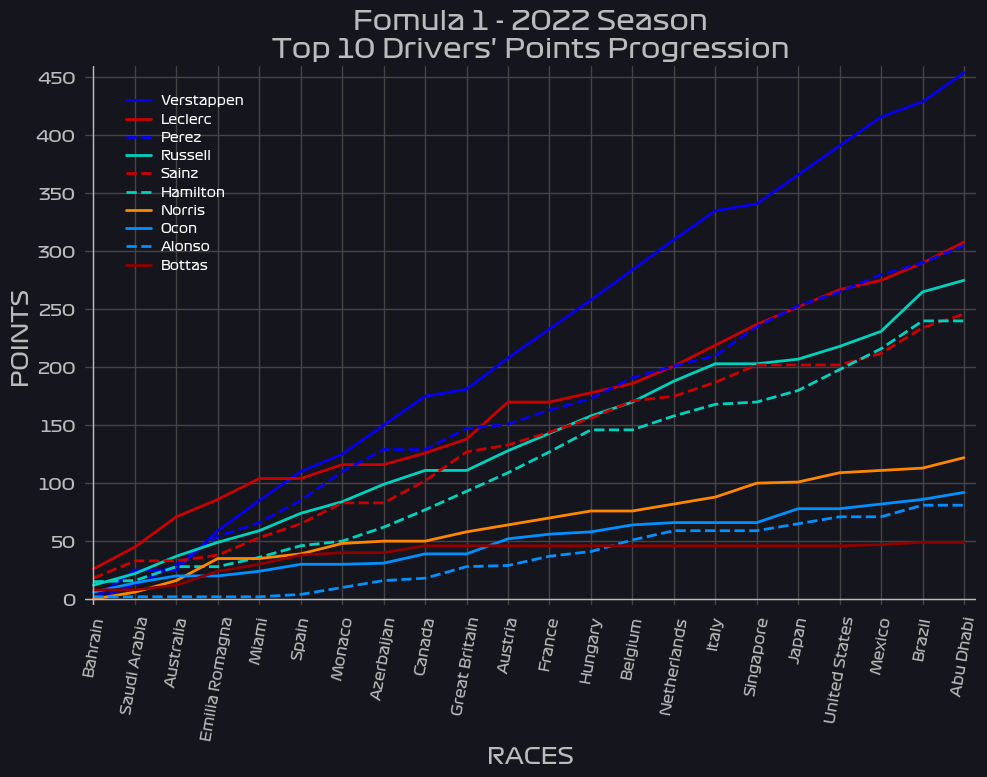

In [19]:
tracks = season2022RaceResults['Track'].unique()
tracksSprint = season2022SprintRaceResults['Track'].unique()
plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'Formula1'
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,460])
c = assign_color('drivers', driverStandingsTop10)
for i in range(10):
    if driverStandingsTop10[i] in ['Sergio Perez', 'Carlos Sainz', 'Lewis Hamilton', 'Fernando Alonso']:   ls = '--'
    else:   ls = '-'
    plt.plot(driverPointsTop10[driverStandingsTop10[i]].cumsum(), label=driverStandingsTop10[i].split()[1], 
             c=c[i], linewidth=2, ls=ls)
plt.title('Fomula 1 - 2022 Season\nTop 10 Drivers\' Points Progression', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACES', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('POINTS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(range(0,460,50), range(0,460,50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.61), fontsize=9)
plt.show()

Magnificent! From this plot above, it was revealed that Charles Leclerc **leapt forward much in the first few races**, but lost the leadership against Max Verstappen after **Spanish GP**. Then, everything was in the Dutchman's favor to obtain the championship title. To be honest, by looking at this points gap getting enlarged against Leclerc almost after every race, he was definitely racing in the league on his own!

About Leclerc vs Perez, their back-to-back challenge for 2nd place started after France GP and continue **until the last race in Abu Dhabi**. Thanks to more points scored than Perez at Yas Marina circuit, the Ferrari driver finished ahead of him, while he had nothing to do with Verstappen.

George Russell, by the way, performed **a long-lasting consistency** series through the first several races (up until Canada GP), by finishing in the top five! Except the first race, the young British driver never got behind Hamilton in the standings throughout the season. Similarly, as another fact for Leclerc, he **never got overtaken to Sainz**, and their gaps became widened after Italy GP.

For the rest of the drivers in top 10, Norris seemed to get a **comfortable 7th place** with almost stable points gap against Ocon and Alonso. In addition, Bottas was in P8 after first several races of the season, but later **stayed behind both Alpine drivers**; and remarkably, a very long straight horizontal line appeared starting from Canada GP, where the Finnish driver could not earn points much for a long time!

In the meantime, let's not forget to draw a bar chart for **total points earned by drivers from Sprint races** this season:

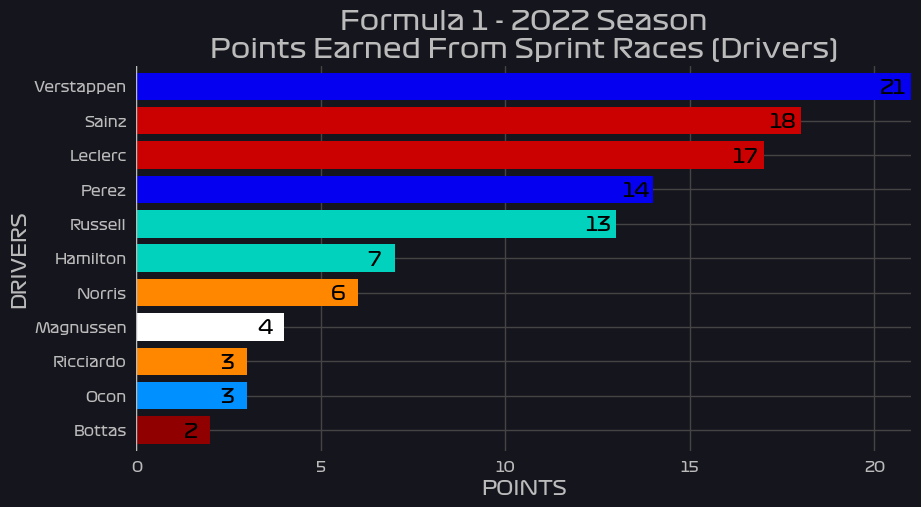

In [20]:
sprintRacePointsNonZero = sprintRacePoints[sprintRacePoints > 0]
plt.figure(figsize=(10,5))
plt.axis([0,21,10.6,-0.6])
c = assign_color('drivers', sprintRacePointsNonZero.index)
plt.barh([driver.split()[1] for driver in sprintRacePointsNonZero.index.values], sprintRacePointsNonZero, color=c)
for i in range(len(sprintRacePointsNonZero)):
    plt.text(sprintRacePointsNonZero[i]-0.85, i+0.2, "{:2}".format(sprintRacePointsNonZero[i]), 
             color='k', fontsize=14, fontweight='bold')
plt.title('Formula 1 - 2022 Season\nPoints Earned From Sprint Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,5), range(0,22,5), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

This clearly explains itself! Verstappen was ahead of everyone here by collecting the most points from Sprint races, **21 of maximum 24** points! Whereas Perez obtained points equalling to two thirds of the Dutch driver.

Two teammates, Sainz and Leclerc became the 2nd and 3rd most points scorers in Sprint races, respectively. They were so close to each other, and the Spaniard got ahead by **just 1 point** in total.

Russell was another driver to get **more than half** of the maximum available points in Sprints. Surely, the win in Brazil (+8 points) brought him to upper places there much! On the other hand, Hamilton did not get much of the points, staying at 7 points.

All in all, **11 different drivers** and **7 different teams** benefited from the distribution of points offered in Sprint races, which affected both Drivers and Constructors Strandings more or less.

## 2022 Season - Constructors Standings

Now, let's check how the final Constructors Standings of 2022 Season took shape:

In [21]:
racePointsTeam = season2022RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
sprintRacePointsTeam = season2022SprintRaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
constructorStandings['POS'] = range(1,11)
constructorStandings.set_index('POS', inplace=True)
constructorStandings

,Team,Points
POS,,
1,Red Bull Racing RBPT,759
2,Ferrari,554
3,Mercedes,515
4,Alpine Renault,173
5,McLaren Mercedes,159
6,Alfa Romeo Ferrari,55
7,Aston Martin Aramco Mercedes,55
8,Haas Ferrari,37
9,AlphaTauri RBPT,35


As a result, Red Bull obtained the Constructors champion title **by over 200 points** against Mercedes and Ferrari. That's also the end of the dominance for Mercedes which lasted for 8 consecutive seasons!

About 4th place, **Alpine** successfully got ahead of McLaren with 14 points of gap between them. Going below, both **Alfa Romeo** and **Aston Martin** were tied for 6th place, but the former team claimed that position. And in the bottom, it's sad to see Williams with their points not even a two-digit number, although they weren't pointless this season.

## Points Progression of All Teams Throughout The Season

Well, if you agree with me, the final Constructors Standings above **does not give us a clear picture** of how all the teams ended up until that point! For this reason, it will be much better to display a plot like below to reflect everything about the points progression, similar to the one with top 10 drivers this season:

In [22]:
teamNames = constructorStandings['Team'].unique()
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = season2022RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = season2022SprintRaceResults.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
sp = [3, 10, 20]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]

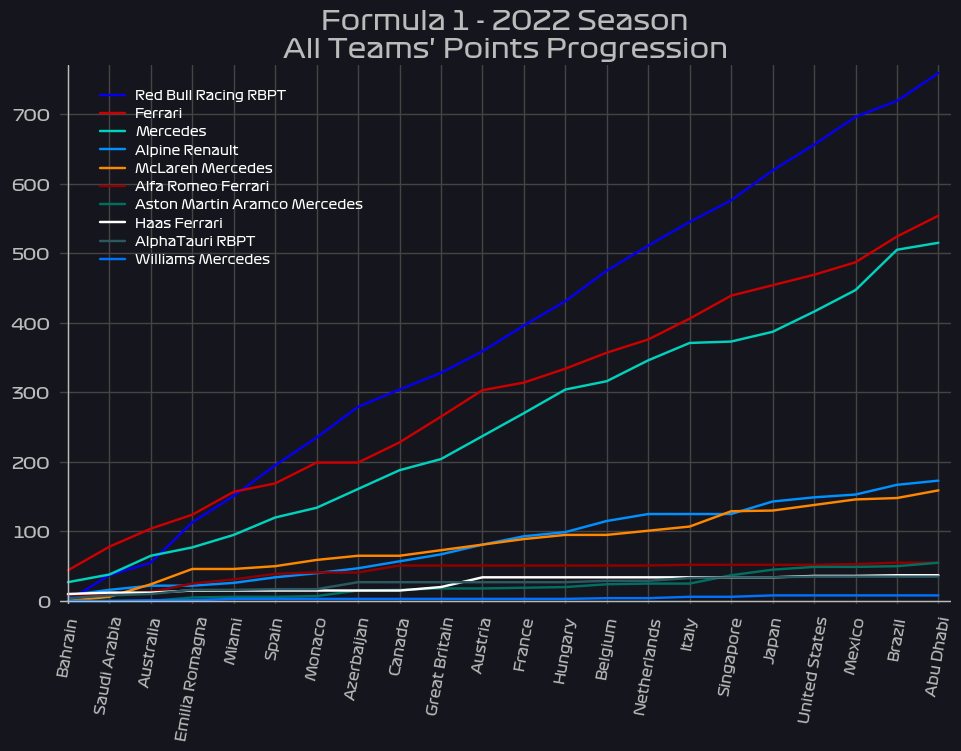

In [23]:
c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,770])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('Formula 1 - 2022 Season\nAll Teams\' Points Progression', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

That's more like it! From the plot, it seems Red Bull started the season behind Ferrari and Mercedes, but they've taken the lead after **Spanish GP**. After that, they never left from the top position and even widened the points gap more and more each race!

About Mercedes and Ferrari duo, it is clear to see that the Italian team **always got ahead** of their close rival for maintaining the 2nd place; their points gap always increased and decreased down race by race, and the closest one seemed to happen in Brazil.

For 4th place, clearly there was a fierce head-to-head battle between **Alpine** and **McLaren** teams. However, the French team was the one to outperform the others after **Japanese GP** and never looked back.

Discussing the 6th place, Alfa Romeo **had the superiority** against the rest of the teams, especially those from midfield group! But there existed a very long straight horizontal line, starting from Canada GP, while the rival teams' points were getting risen up. At the end, perhaps beating Aston Martin drivers in the last race helped them to secure their deserved position.

## 2022 Season - Race Winners

Doubtlessly, winning a race in F1 must be **the utmost super feeling** for any driver and team, because all the hard works made on the car, a great pace on the track, the trustworthiness of the driver and a bit of luck together bring them to victory! So, here comes the winners of every race that has been organized in 2022 Season:

In [24]:
season2022RaceResults[season2022RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
Saudi Arabia,1,Max Verstappen,Red Bull Racing RBPT,4,50,1:24:19.293,25,No,1:31.772
Australia,16,Charles Leclerc,Ferrari,1,58,1:27:46.548,26,Yes,1:20.260
Emilia Romagna,1,Max Verstappen,Red Bull Racing RBPT,1,63,1:32:07.986,26,Yes,1:18.446
Miami,1,Max Verstappen,Red Bull Racing RBPT,3,57,1:34:24.258,26,Yes,1:31.361
Spain,1,Max Verstappen,Red Bull Racing RBPT,2,66,1:37:20.475,25,No,1:25.456
Monaco,11,Sergio Perez,Red Bull Racing RBPT,3,64,1:56:30.265,25,No,1:16.028
Azerbaijan,1,Max Verstappen,Red Bull Racing RBPT,3,51,1:34:05.941,25,No,1:46.050
Canada,1,Max Verstappen,Red Bull Racing RBPT,1,70,1:36:21.757,25,No,1:15.839


Yes, from the table above, we can say that it's mostly teeming with **Max Verstappen**'s and **Red Bull**'s name! Amongst many of the races, the team and the Dutchman scored race wins successively (6 and 9 times), including Sergio Perez in the middle. This also shows a clear dominance against rivals for both Drivers and Constructors standings!

If we count the number of race wins by drivers this season, then this visual below greets us:

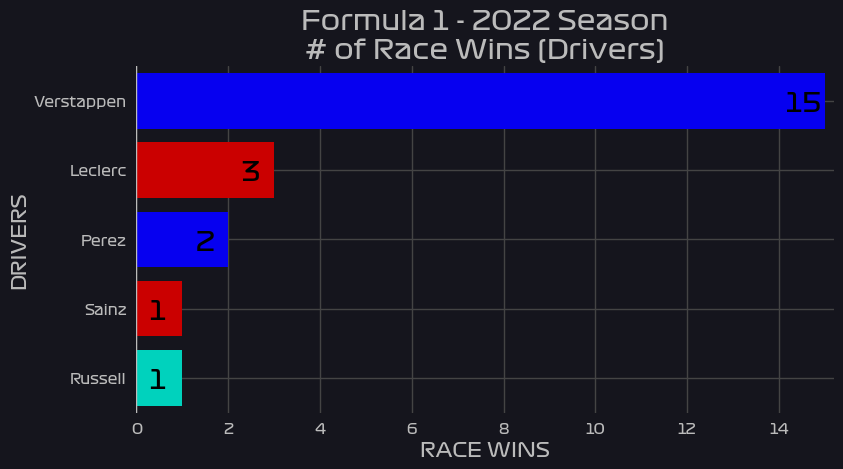

In [25]:
winners = season2022RaceResults[season2022RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', winners.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,15.2,4.5,-0.5])
plt.barh([driver.split()[1] for driver in winners.index], winners, color=c)
for i in range(len(winners)):
    plt.text(winners[i]-1, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Race Wins (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

It is clear to state that Max Verstappen took the win of **almost two thirds of the races** of 2022 Season! Moreover, the number of race wins from him is equal to 5-fold of Charles Leclerc's win count! Besides, his teammate Sergio Perez only stayed at 2 wins, which came from the street race tracks, Monaco and Singapore.

Certainly, **Carlos Sainz** and **George Russell** finally achieved to join Grand Prix race winners club this season! We wonder whether they can repeat the same accomplishment in the future...

## 2022 Season - Pole Positions

Starting races on pole position is an important feat for any driver and any team. With the facts such as perfect car settings, fresh soft tyres, maximum grip on the asphalt, plus great driving to put everything together for the fastest lap time in qualifying, then it becomes a deserved thing to start the race in the first place on Sunday!

If you wonder which drivers were polesitters in all races of 2022 Season, take a look at the two tables below. Keep in mind that the broad one is for **those with regular race weekend structure** i.e. qualifying sessions on Saturday; whereas the second one is **where Sprint races were available** in the weekend, hence organized on Friday:

In [26]:
season2022PolePos = season2022RaceResults[season2022RaceResults['Starting Grid'] == 1].set_index('Track') \
    .drop('Starting Grid', axis=1).drop(['Emilia Romagna','Austria','Brazil'], axis=0)
polePos = {}
for driver in season2022PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2022PolePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,1,16,Charles Leclerc,Ferrari,57,1:37:33.584,26,Yes,1:34.570
Saudi Arabia,4,11,Sergio Perez,Red Bull Racing RBPT,50,+10.800,12,No,1:32.042
Australia,1,16,Charles Leclerc,Ferrari,58,1:27:46.548,26,Yes,1:20.260
Miami,2,16,Charles Leclerc,Ferrari,57,+3.786,18,No,1:31.488
Spain,NC,16,Charles Leclerc,Ferrari,27,DNF,0,No,1:27.030
Monaco,4,16,Charles Leclerc,Ferrari,64,+2.922,12,No,1:16.249
Azerbaijan,NC,16,Charles Leclerc,Ferrari,21,DNF,0,No,1:47.531
Canada,1,1,Max Verstappen,Red Bull Racing RBPT,70,1:36:21.757,25,No,1:15.839
Great Britain,1,55,Carlos Sainz,Ferrari,52,2:17:50.311,25,No,1:30.813


According to the table above, we encounter **Charles Leclerc**'s name mostly, especially he became the polesitter in **6 out of first 7 Grands Prix**! However, the Monegasque driver successfully turned these into race wins in only 2 locations, Bahrain and Australia.

Unlike Leclerc, Max Verstappen's all pole positions ended up with race wins for himself which is terrific!

In all these rows, we only saw Mercedes' name at Hungary, where George Russell achieved to set the fastest lap; which was **the first pole** in his F1 career!

In [27]:
season2022PolePosSprint = season2022SprintRaceResults[season2022SprintRaceResults['Starting Grid'] == 1] \
    .set_index('Track').drop('Starting Grid', axis=1)
polePosSprint = {}
for driver in season2022PolePosSprint['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2022PolePosSprint

,Position,No,Driver,Team,Laps,Time/Retired,Points
Track,,,,,,,
Emilia Romagna,1,1,Max Verstappen,Red Bull Racing RBPT,21,30:39.567,8
Austria,1,1,Max Verstappen,Red Bull Racing RBPT,23,26:30.059,8
Brazil,8,20,Kevin Magnussen,Haas Ferrari,24,+28.768,1


Now, for the qualifying sessions on Friday. Remember that in such race weekends, **these formed the Sprint races' starting grid**; that's why we see less information, as I grabbed them from another dataset. Here, Verstappen took the poles in Emilia Romagna (Imola) and Austria GP.

Well, you must be astonished how **Kevin Magnussen** appeared here for Brazil GP! If you memorize what happened in Friday's qualifying there, particularly in Q3, Magnussen did a lap with somewhat dry conditions before rain arrived over the track, and then other drivers did not do much against wet surface even when there were plenty of time. By staying in the garage until the time ran out, that's how the Danish driver earned the pole **for the first time in his career**; meanwhile, that was the first for Haas team, too! Despite starting first in the Sprint race, he could not match with the top teams' pace overall, and consequently, completed the short race in 8th race (verify it with the corresponding result table above).

Anyway, the visual below will tell us the unique drivers and their counts for pole positions in 2022:

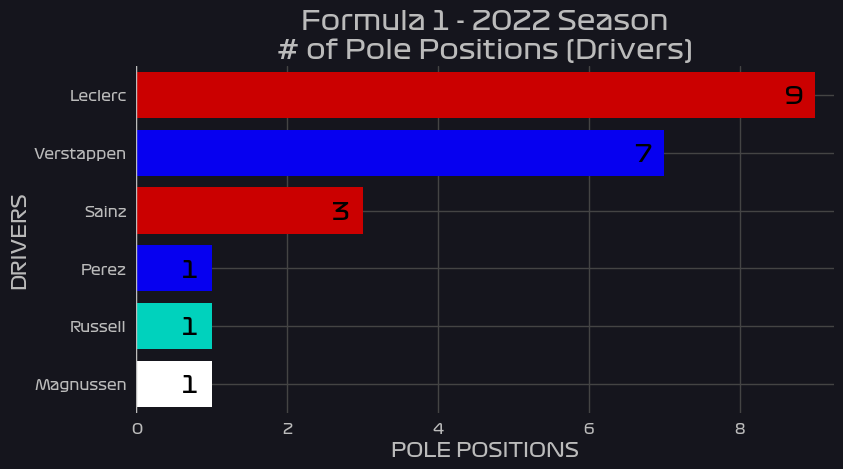

In [28]:
polePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', polePositions.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,9.25,5.5,-0.5])
plt.barh([driver.split()[1] for driver in polePositions.index], polePositions, color=c)
plt.title('Formula 1 - 2022 Season\n# of Pole Positions (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(polePositions)):
    plt.text(polePositions[i]-0.4, i+0.15, polePositions[i], fontsize=18, fontweight='bold', color='k')
plt.xlabel('POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

In general, Charles Leclerc was the driver with the most poles, **total of 9 times!** Nevertheless, as you can confirm from the table above, this wasn't enough to beat Verstappen!

Together with this, the 2022 Season champion Max Verstappen became the polesitter in 7 different races, but his teammate Perez achieved it only in one race weekend (Saudi Arabia GP), **this was the first** in his career!

Similarly, as explained above, Russell and Magnussen also had their first pole added to their F1 careers this season.

On the other hand, we could not see Lewis Hamilton to **not score any pole position** in 2022; he experienced this situation for the first time since his beginning in 2007!

**Do you think this is 100% correct?** Well, if you reach the _Qualifying Analysis_ section, you'll see that there is a minor change with the numbers where one driver's number is **one more** and the other one's is **one less**. You are curious now, aren't you?

## 2022 Season - Podium Finishes

As always, it is a great feeling for an F1 driver to **step on the podium** for any race, then lift up the trophy to the air and drink the champagne; celebrating the achievement with his team members altogether... Here, it's time to learn which and how many times drivers completed races in top three this season: 

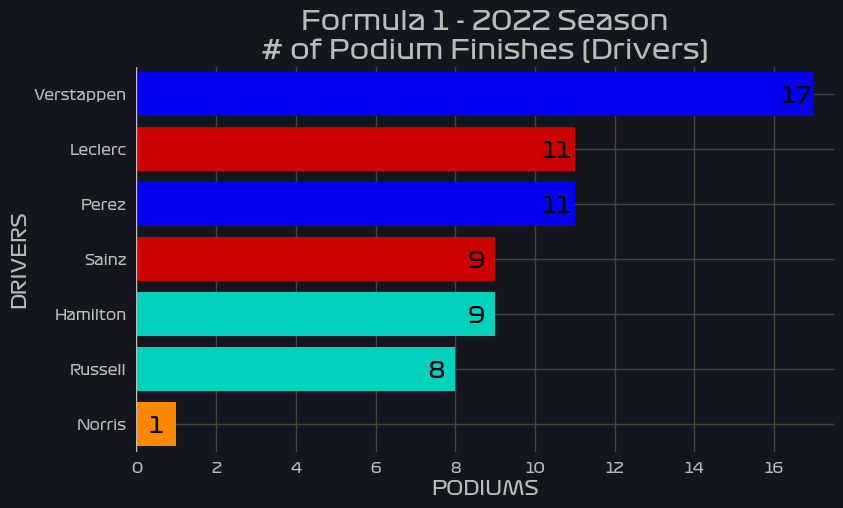

In [29]:
podiumFinishes = season2022RaceResults[season2022RaceResults['Position'].isin(['1','2','3'])]['Driver'].value_counts()
c = assign_color('drivers', podiumFinishes.index)
plt.figure(figsize=(9,5))
plt.axis([0,17.5,6.5,-0.5])
plt.barh([driver.split()[1] for driver in podiumFinishes.index], podiumFinishes, color=c)
for i in range(len(podiumFinishes)):
    plt.text(podiumFinishes[i]-0.95, i+0.15, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Podium Finishes (Drivers)', fontsize=19, weight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Yeah, it is not surprising to see that the champion Max Verstappen also had the most podium finishes in 2022 Season, with total of **17**; which was **6 podiums higher** than his close rivals, Charles Leclerc and his teammate Sergio Perez!

Then, Sainz and Hamilton succeeded the same number of podiums with **9**. The Briton's compatriot, Russell was seen on the podium ceremony **8 times**, which should be pretty good in his first season with Mercedes team.

Besides the drivers from top three teams, the only driver from the rest was **Lando Norris** from McLaren team. Well, we the spectators were able to see him on the podium in **Emilia Romagna GP**.

## 2022 Season - Top 10 Finishes

To make it even broader, now let's count all drivers' **top 10 finishes** this time. That is, we are seeking the answer for the question: how many times did the drivers complete races with points in 2022 Season?

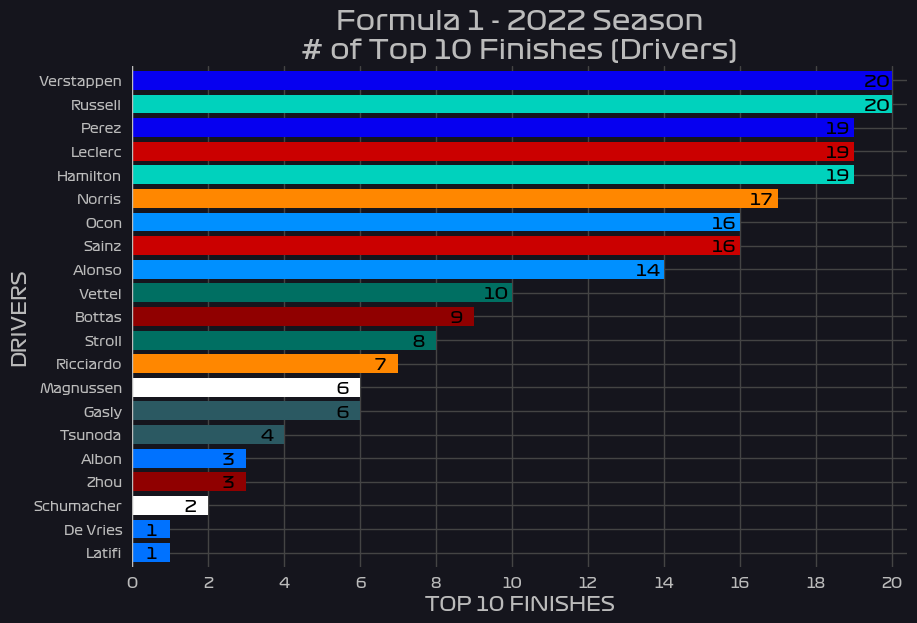

In [30]:
top10Finishes = season2022RaceResults[season2022RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10Finishes.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,20.4,20.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    plt.text(top10Finishes[i]-0.83, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Top 10 Finishes (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,2), range(0,22,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

This is it! **Max Verstappen** and **George Russell** shared the top positions of being the most top 10 finishers this season, with **20** locations. The races where the Dutchman did not earn points were Bahrain and Australia, ended with DNF. Similarly, Russell completed the races in Great Britain (DNF) and Singapore (P14) with no points.

Then, these trio **Perez**, **Leclerc** and **Hamilton** were coming after them, successfully completing 19 different races with points finishes. Next, there were **five** other drivers who achieved to finish in the top 10 in ten or more races: Norris, Ocon, Sainz, Alonso and Vettel, in descending order.

By comparing the teammates, the biggest gap appeared to come from **McLaren** drivers, although Lando Norris was in points finishes in 17 different races, Daniel Ricciardo's number was significantly less, which was 7!

**Nyck De Vries** also appeared in this visual, because in Italy GP race weekend, he replaced Alex Albon who was in hospital for appendicitis treatment, then with a great drive, he successfully finished the race in **ninth place** and earned two points for himself and Williams team!

## 2022 Season - Fastest Laps (+1 Pt) in Race Sessions

Since 2019, **an additional point** is awarded to the driver who set the fastest lap time in Sunday's race session. Of course, 2022 Season was like no other in terms of grabbing this valuable point for any driver which could affect their placements in Drivers Standings! As part of the race strategy, sometimes we witnessed a few drivers and teams to steal the point from their rivals when there were a couple of laps remaining, such as by putting **the frest set of soft tyres** and **the gap behind the driver was so large**, even there was no allegation for winning the race! However, the only important condition is that the driver must finish in the top 10 in order to get the fastest lap point.

In the table below, we can observe which drivers achieved to put the fastest lap point into their pockets, through all races of 2022 Season. Nevertheless, one can notice that the points have been distributed for **20 different races**...

In [31]:
season2022RaceResults[season2022RaceResults['+1 Pt'] == 'Yes'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,,
Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
Saudi Arabia,2,16,Charles Leclerc,Ferrari,2,50,+0.549,19,Yes,1:31.634
Australia,1,16,Charles Leclerc,Ferrari,1,58,1:27:46.548,26,Yes,1:20.260
Emilia Romagna,1,1,Max Verstappen,Red Bull Racing RBPT,1,63,1:32:07.986,26,Yes,1:18.446
Miami,1,1,Max Verstappen,Red Bull Racing RBPT,3,57,1:34:24.258,26,Yes,1:31.361
Spain,2,11,Sergio Perez,Red Bull Racing RBPT,5,66,+13.072,19,Yes,1:24.108
Monaco,6,4,Lando Norris,McLaren Mercedes,5,64,+12.231,9,Yes,1:14.693
Azerbaijan,2,11,Sergio Perez,Red Bull Racing RBPT,2,51,+20.823,19,Yes,1:46.046
Canada,2,55,Carlos Sainz,Ferrari,3,70,+0.993,19,Yes,1:15.749


Let me tell you; those races, where the fastest lap point was not given, happened in **Singapore** and **Japan**: There, **George Russell** set the fastest lap time in Singapore with **1:46.458**, but finished the race in **P14**. For the other one, **Guanyu Zhou** went the fastest in one lap with **1:44.411** in Japan, but no point was earned due to completing the race in P16.

Again, from this table, we see some patterns in terms of drivers: **Leclerc** became the driver for having the fastest lap times **in the first three races** of the season. Similarly, **Russell** had this at most three consecutive races where the conditions were valid.

Moreover, in **five different race weekends**, the driver who started on pole position and won the race, also successfully gained the fastest lap point to maximize their efforts!

Now, let's observe the drivers altogether for how many times they earned the fastest lap time points in 2022 Season:

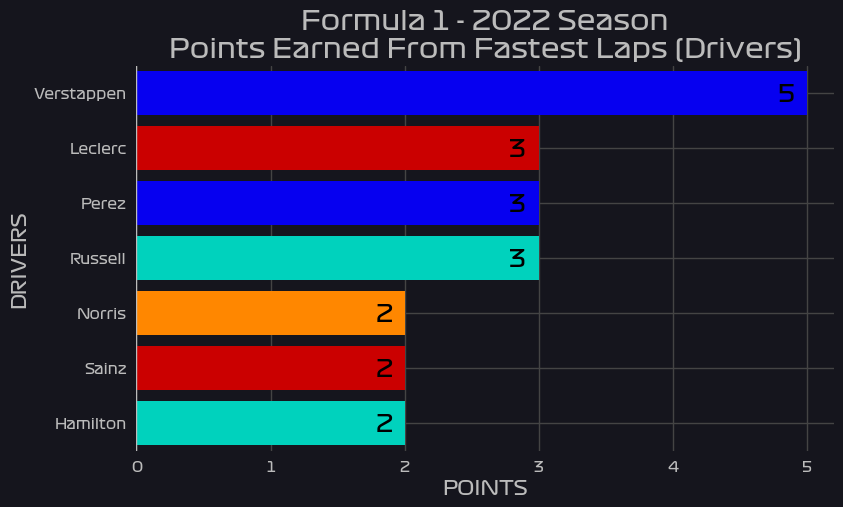

In [32]:
fastestLapPoints = season2022RaceResults[season2022RaceResults['+1 Pt'] == 'Yes']['Driver'].value_counts()
c = assign_color('drivers', fastestLapPoints.index)
plt.figure(figsize=(9,5))
plt.axis([0,5.2,6.5,-0.5])
plt.barh([driver.split()[1] for driver in fastestLapPoints.index], fastestLapPoints, color=c)
for i in range(len(fastestLapPoints)):
    plt.text(fastestLapPoints[i]-0.22, i+0.15, fastestLapPoints[i], fontsize=17, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\nPoints Earned From Fastest Laps (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

The champion **Max Verstappen** also became the driver with the most points earned from fastest laps through race sessions, witha total of 5 times!

After him, **Leclerc**, **Perez** and **Russell** obtained these points three times in the whole season. Later, **Norris**, **Sainz**, and **Hamilton** got them twice.

Overall, **seven** different drivers acheived to set the fastest lap times in different races of 2022, by taking into account their top 10 finishes. Generally speaking, this is actually **eight** if we include Zhou.

## 2022 Season - Qualifying Analysis

Now is the time for the qualifying analysis of this season. Let's learn who set **the fastest lap time** on **Saturday** (or **Friday** if Sprint race was featured) of each race weekend, by checking the table below:

In [33]:
season2022QualifyingResults[season2022QualifyingResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Q1,Q2,Q3,Laps
Track,,,,,,,
Bahrain,16,Charles Leclerc,Ferrari,1:31.471,1:30.932,1:30.558,15
Saudi Arabia,11,Sergio Perez,Red Bull Racing RBPT,1:29.705,1:28.924,1:28.200,20
Australia,16,Charles Leclerc,Ferrari,1:18.881,1:18.606,1:17.868,21
Emilia Romagna,1,Max Verstappen,Red Bull Racing RBPT,1:19.295,1:18.793,1:27.999,22
Miami,16,Charles Leclerc,Ferrari,1:29.474,1:29.130,1:28.796,25
Spain,16,Charles Leclerc,Ferrari,1:19.861,1:19.969,1:18.750,12
Monaco,16,Charles Leclerc,Ferrari,1:12.569,1:11.864,1:11.376,24
Azerbaijan,16,Charles Leclerc,Ferrari,1:42.865,1:42.046,1:41.359,19
Canada,1,Max Verstappen,Red Bull Racing RBPT,1:32.219,1:23.746,1:21.299,30


Yeah, from this table, we come across **Charles Leclerc**'s and **Max Verstappen**'s name most of the times by setting the fastest lap time in the qualifying sessions, by looking at the **Q3** column (well, there is a reason for why I called it _the fastest lap time_) As you can realize that these times are better than those in **Q1** and **Q2** (only it got worse in **Emilia Romagna GP** perhaps due to wet conditions were encountered at that time).

Next, let's observe the drivers and the numbers of their fastest lap times set in qualifying sessions with the visual below:

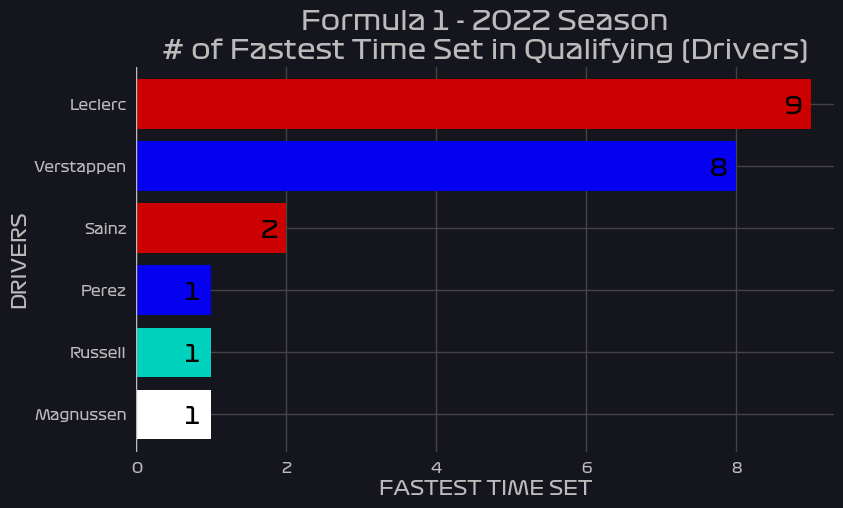

In [34]:
fastestTimeQualifying = season2022QualifyingResults[season2022QualifyingResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', fastestTimeQualifying.index)
plt.figure(figsize=(9,5))
plt.axis([0,9.3,5.6,-0.6])
plt.barh([driver.split()[1] for driver in fastestTimeQualifying.index], fastestTimeQualifying, color=c)
for i in range(len(fastestTimeQualifying)):
    plt.text(fastestTimeQualifying[i]-0.35, i+0.15, fastestTimeQualifying[i], fontsize=17, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Fastest Time Set in Qualifying (Drivers)', fontsize=19, fontweight='bold', 
          color='#bbbbbb')
plt.xlabel('FASTEST TIME SET', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, if we compare this bar chart against the one with title _# of Pole Positions (Drivers),_ we'll understand that the number for Verstappen should've been one more **(8)**, and one less **(2)** for Sainz. But why?

If you watched every race weekend qualifying sessions, sometimes **grid penalties** might be given to drivers afterwards, because of exceeding usage of particular engine component changes or incidents such that a driver blocked another driver's fast lap. **In Belgium GP**, such a scenario was happened; Max set the fastest lap time, but later received grid penalties for engine component changes (dropping him back to P14 for Sunday's race grid), thus **he handed over the pole position to Sainz!**

Anyway, let's expand the qualifying session analysis with something remarkable and exciting: Which drivers moved into **Q2 in every qualifying sessions?** In general, how many times any driver was seen in Q2 in different race weekends? The answer can be found in the bar chart below:

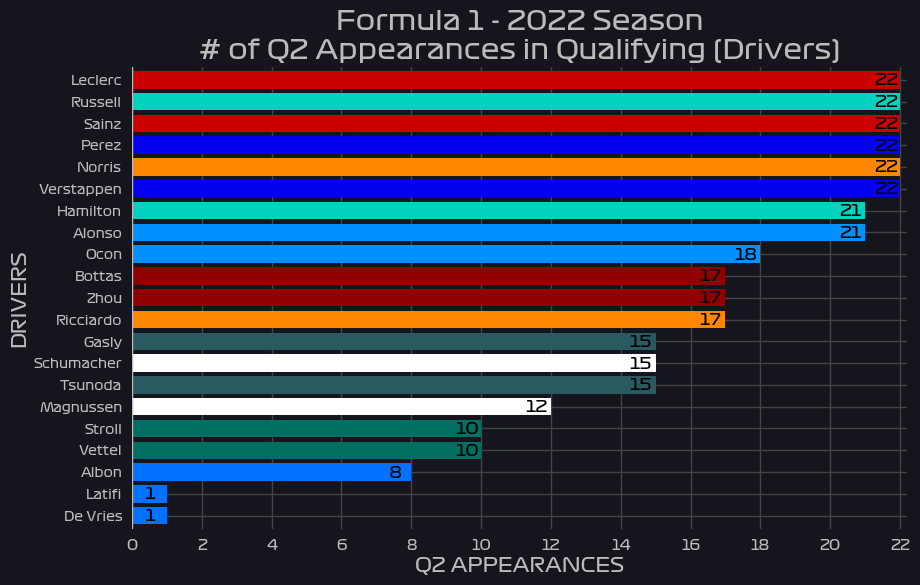

In [35]:
qualiQ2 = season2022QualifyingResults[season2022QualifyingResults['Position'].isin([str(i) for i in range(1,16)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ2.index)
plt.figure(figsize=(10,6))
plt.axis([0,22.2,20.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ2.index], qualiQ2, color=c)
for i in range(len(qualiQ2)):
    plt.text(qualiQ2[i]-0.75, i+0.24, "{:>2}".format(qualiQ2[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Formula 1 - 2022 Season\n# of Q2 Appearances in Qualifying (Drivers)", fontsize=19, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q2 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Wow! Total of 6 drivers, who are **Leclerc**, **Russell**, **Sainz**, **Perez**, **Norris** and **Verstappen**, achieved to appear in Q2 in all qualifying sessions!

**Hamilton** failed to do it once, in **Saudi Arabia GP**, where he was placed in 16th place! Likewise, we did not see **Alonso** to move into Q2 in Spain, his final result was P17!

All in all, every driver of 2022 Season grid, including reserve driver De Vries, have seen the Q2 section of qualifying sessions **at least once!** Among all of full-season racers; ahh, poor **Latifi**, he got the least amount of Q2 appearances, only 1 (in Great Britain GP).

Then, let's bring it further by analyzing **the number of occurrences in Q3** of qualifying for all drivers in 2022 Season:

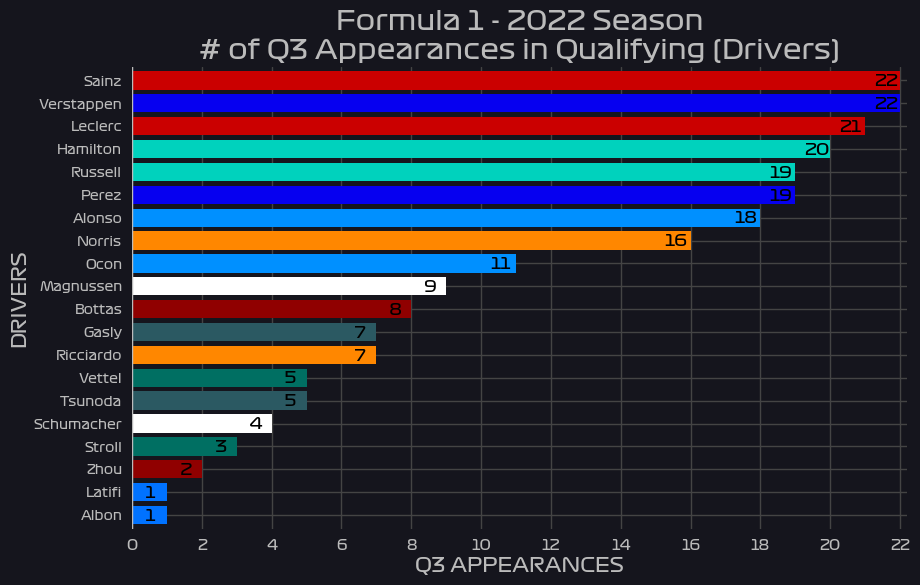

In [36]:
qualiQ3 = season2022QualifyingResults[season2022QualifyingResults['Position'].isin([str(i) for i in range(1,11)])] \
    ['Driver'].value_counts()
c = assign_color('drivers', qualiQ3.index)
plt.figure(figsize=(10,6))
plt.axis([0,22.2,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in qualiQ3.index], qualiQ3, color=c)
for i in range(len(qualiQ3)):
    plt.text(qualiQ3[i]-0.75, i+0.24, "{:>2}".format(qualiQ3[i]), fontsize=12, fontweight='bold', color='k')
plt.title("Formula 1 - 2022 Season\n# of Q3 Appearances in Qualifying (Drivers)", fontsize=19, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('Q3 APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,23,2), range(0,23,2), color='#bbbbbb')
plt.yticks(fontsize=9, color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

Oh, look at that! **Sainz** and **Verstappen** appeared in all 22 qualifying sessions of 2022! That means, these two drivers always got the chance to fight for pole position! In addition, **Leclerc** has followed them with one less appearance (the failure came from **Canadian GP**).

**Checo Perez**, unlike Verstappen, has failed to advance into Q3 by a total of three times; these Grands Prix were **Canada**, **Austria** and **Hungary**.

If we see the bottom, **both Williams drivers** have achieved to got through the Q3 only **once** in the whole season! Latifi and Albon earned the chance for pole position challenge in **Great Britain** and **Belgium**, respectively.

In the big picture, similar to Q2 visualization, all drivers experienced the progression to Q3 at least one time in all qualifying sessions of 2022 Season.

## 2022 Season - DNF Analysis

The next section of the analyses will be about **DNFs** _(Did Not Finish)._ You know, it might be shameful for any driver to retire from any race because of the reasons such as self-driving mistakes ending up hitting the barriers or being stuck at sandpool, receiving performance-impacting damages by collision with other rivals or mechanical failures (e.g. engine, transmission).

This bar chart below tells us the total number of DNFs of all drivers experienced in 2022 Season:

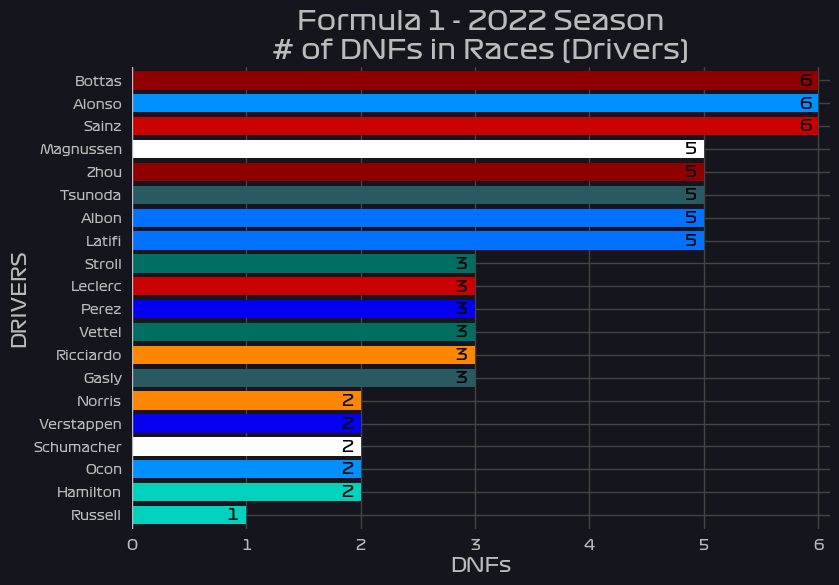

In [37]:
DNFdriver = season2022RaceResults[season2022RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,6))
plt.axis([0,6.1,19.6,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of DNFs in Races (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

From here, all drivers in F1 grid (except reserve drivers) became the victim of DNF **at least once** in all races of the 2022 Season calendar!

With specific inspection, we see that **Bottas** from Alfa Romeo, **Alonso** from Alpine and **Sainz** from Ferrari had the most DNFs in this season, which was **six times!** Then, these five drivers **Magnussen**, **Zhou**, **Tsunoda**, **Albon** and **Latifi** form the group of **five DNFs.**

Even **Verstappen** failed to complete two different races; these are **Bahrain** and **Australia**, the 1st and 3rd races of the season, respectively.

Only **George Russell** had the least amount of DNFs in the whole season; just **one race** which came from the first lap of **Great Britain GP**.

And, with regards to teams, **Mercedes** had their cars not seeing the chequered flag a total of **three times**. In other words, drivers of the German team succeeded to complete races the most number of times than any other teams!

Now, let's count the DNFs according to different race tracks of 2022 calendar:

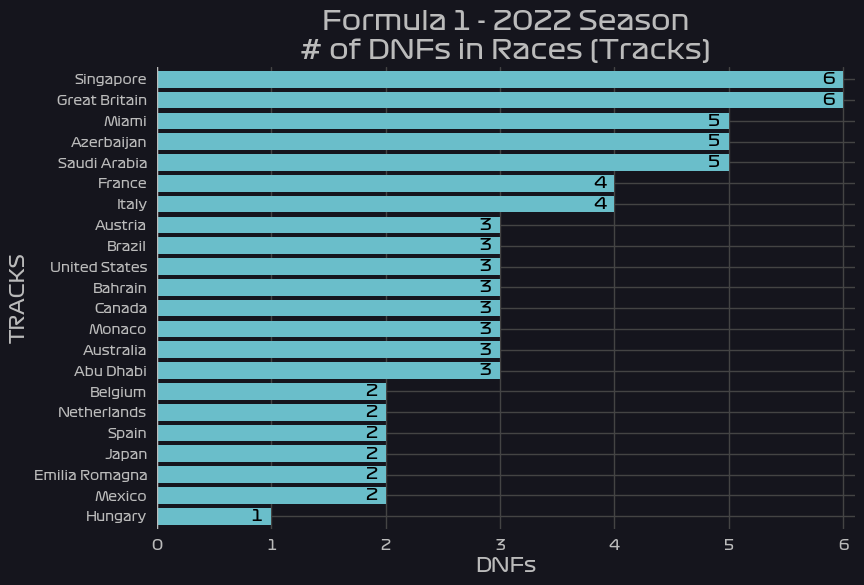

In [38]:
DNFtrack = season2022RaceResults[season2022RaceResults['Time/Retired'] == 'DNF']['Track'].value_counts()
plt.figure(figsize=(9,6))
plt.axis([0,6.1,21.6,-0.6])
plt.barh(DNFtrack.index, DNFtrack, color='#6abeca')
plt.title('Formula 1 - 2022 Season\n# of DNFs in Races (Tracks)', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TRACKS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Within the 22-race long 2022 Season, we saw at least one driver becoming DNF, according to the bar chart above.

Among all of them, **Singapore** and **Great Britain** Grands Prix experienced the most DNFs this season, total of 6. Then, spectators in **Miami**, **Azerbaijan** and **Saudi Arabia** saw **five** different drivers not completing the races individually.

On the other hand, only **Hungary GP** had the most runners completing the race this season; the only DNF came from **Valtteri Bottas** (Alfa Romeo) with a couple of laps remaining.

Beyond these DNFs, there are DNS _(Did Not Start)_ incidents happened, such that **the cars were not in good shape sufficiently** to participate in the starting grid of the race session, due to serious damage occurred from the previous sessions and there wasn't enough time to fix everything; surely, this was disappointing for such drivers.

From the list below, only total of **two DNS**es appeared in 2022 Season and they were from the same race weekend, **Saudi Arabia GP**. Tsunoda and Schumacher were not able to race there completely!

In [39]:
season2022RaceResults[season2022RaceResults['Time/Retired'] == 'DNS'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,,
Saudi Arabia,NC,22,Yuki Tsunoda,AlphaTauri RBPT,19,0,DNS,0,No,NaN
Saudi Arabia,NC,47,Mick Schumacher,Haas Ferrari,20,0,DNS,0,No,NaN


And, another remarkable fact to show here is that there were such incidents where the drivers became DNF, but classified in the race results by traveling **more than 90% of the race distance**.

The list below indicates that total of **10 different drivers** individually had this aforementioned incident. Perhaps, the most attractive ones should be coming from **Perez** and **Verstappen** in Bahrain, due to the issues they got in the closing section of the race; and consequently, they were classified in **18th** and **19th** places, respectively.

In [40]:
season2022RaceResults[(season2022RaceResults['Time/Retired'] == 'DNF') & (season2022RaceResults['Position'] != 'NC')] \
    .set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,,
Bahrain,18,11,Sergio Perez,Red Bull Racing RBPT,4,56,DNF,0,No,1:36.089
Bahrain,19,1,Max Verstappen,Red Bull Racing RBPT,2,54,DNF,0,No,1:35.440
Saudi Arabia,14,23,Alexander Albon,Williams Mercedes,16,47,DNF,0,No,1:34.368
Miami,16,20,Kevin Magnussen,Haas Ferrari,16,56,DNF,0,No,1:33.511
Miami,17,5,Sebastian Vettel,Aston Martin Aramco Mercedes,13,54,DNF,0,No,1:33.479
Azerbaijan,16,18,Lance Stroll,Aston Martin Aramco Mercedes,19,46,DNF,0,No,1:48.038
Hungary,20,77,Valtteri Bottas,Alfa Romeo Ferrari,8,65,DNF,0,No,1:24.002
Mexico,19,14,Fernando Alonso,Alpine Renault,9,63,DNF,0,No,1:22.866
Abu Dhabi,18,44,Lewis Hamilton,Mercedes,5,55,DNF,0,No,1:29.788


## 2022 Season - Driver of the Day Votes

Here comes the new section of F1 Data Analyses for the first time, **Driver of the Day Votes**. As you know, during the race session on Sunday, especially after when there are less than 20 laps remaining, a notification appears on the screen, telling you that you can **vote for any driver from F1's official web site** to place to the top of the list; and upon race completion, that driver who earned the DotD is announced.

No points are offered for the driver who was selected as Driver of the Day for any race. Nevertheless, it is a **good accolade** for them to remember, due to performing the best superb driving, amazing overtakes against rivals or just nice memorial things.

Below you can observe the complete list of Driver of the Day votes of all races in 2022 Season, including drivers in top 5 and their vote percentages:

In [41]:
season2022DotdVotes

,1st Place,1st Place(%),2nd Place,2nd Place(%),3rd Place,3rd Place(%),4th Place,4th Place(%),5th Place,5th Place(%)
Track,,,,,,,,,,
Bahrain,Charles Leclerc,28.3,Kevin Magnussen,22.5,Max Verstappen,9.0,Lewis Hamilton,5.1,Guanyu Zhou,5.0
Saudi Arabia,Charles Leclerc,26.8,Max Verstappen,14.5,Lewis Hamilton,10.1,Sergio Perez,9.5,Kevin Magnussen,7.5
Australia,Charles Leclerc,19.7,Sergio Perez,14.8,Daniel Ricciardo,9.4,George Russell,9.3,Alexander Albon,8.2
Emilia Romagna,Max Verstappen,14.7,Sergio Perez,11.5,Lando Norris,11.0,George Russell,9.3,Yuki Tsunoda,8.7
Miami,Max Verstappen,18.0,Mick Schumacher,14.5,George Russell,12.7,Charles Leclerc,8.6,Sergio Perez,7.6
Spain,Lewis Hamilton,22.8,Sergio Perez,16.3,George Russell,15.7,Max Verstappen,11.4,Fernando Alonso,6.9
Monaco,Sergio Perez,27.6,Pierre Gasly,10.5,Carlos Sainz,9.9,Charles Leclerc,8.8,Fernando Alonso,7.4
Azerbaijan,Lewis Hamilton,14.8,Max Verstappen,13.6,Sebastian Vettel,13.1,Sergio Perez,10.0,Pierre Gasly,9.3
Canada,Charles Leclerc,21.6,Lewis Hamilton,11.9,Carlos Sainz,10.6,Max Verstappen,10.2,Fernando Alonso,6.0


From this list above, we can make these clear implications:

* **Charles Leclerc** has been selected as DotD **for the first three race weekends**, thanks to his great driving performed during the sessions of these, thus making Ferrari crew and Tifosi proud in this way.
* **Mick Schumacher** was the DotD in Austria, because he successfully finished P6 (also this was his best finishing position in 2022 Season), so the crowd must be very pleased to see his great actions on the track and honor him for finishing high.
* The drivers' champion **Max Verstappen** earned this accolade three consecutive time in the middle of the season (Hungary, Belgium & Netherlands).
* In Italy, **Nyck De Vries** was the Driver of the Day! Although this was his one-off chance to drive for Williams in Alexander Albon's place, his awesome driving both in qualifying (making to Q3) and race (earning two points by finishing P9) sessions has really attracted all the spectators to give the votes for the Dutch driver.
* In Abu Dhabi, this was **Sebastian Vettel's last race in his F1 career** before the retirement, hence all the fans around the world wanted to give the 4-times world champion a meaningful farewell gift by selecting as DotD logically. It was unbeliveable to see that the vote percentage on him **exceeded 50 percent**!

The bar chart below shows the drivers and their total number of Driver of the Day awards in 2022:

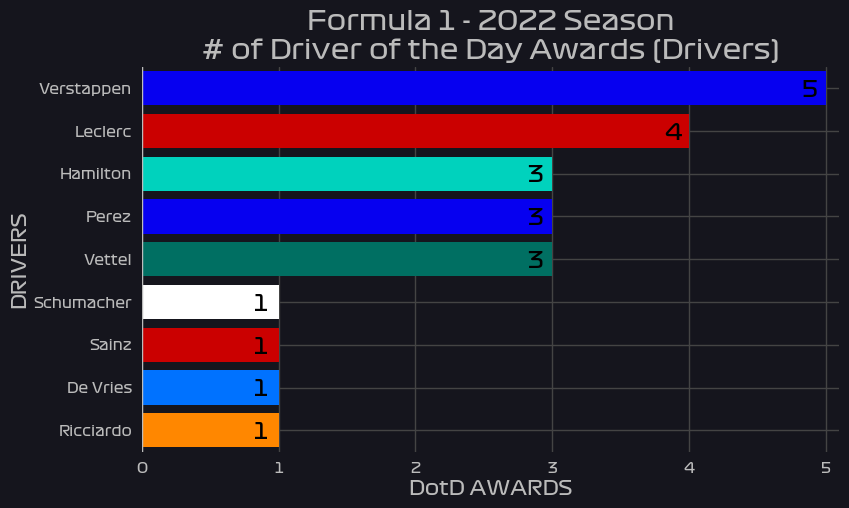

In [42]:
DotdAwards = season2022DotdVotes['1st Place'].value_counts()
c = assign_color('drivers', DotdAwards.index)
plt.figure(figsize=(9,5))
plt.axis([0,5.1,8.5,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAwards.index], DotdAwards, color=c)
for i in range(len(DotdAwards)):
    plt.text(DotdAwards[i]-0.18, i+0.2, DotdAwards[i], fontsize=16, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Driver of the Day Awards (Drivers)', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DotD AWARDS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

According to the visual above, Max Verstappen also appeared as **the most Driver of the Day award winner (5)** in 2022! Then, his close rival Charles Leclerc came after with a total of 4.

Hamilton, Perez and Vettel together earned this award with equal amount, which is 3. Meanwhile, These four drivers Schumacher, Sainz, De Vries and Ricciardo have got the opportunity to get this award once.

All in all, total of **9 different drivers** became the Driver of the Day in all race weekends. Now, let's count all the drivers who were enlisted in the top 5 of the DotD table above:

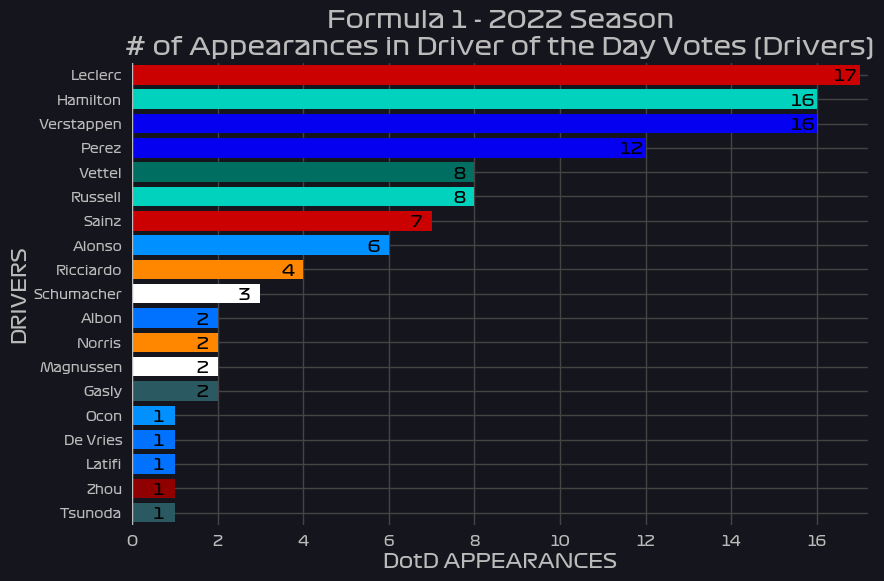

In [43]:
DotdAppearance = {}
for place in range(5):
    for driver in range(len(season2022DotdVotes)):
        d = season2022DotdVotes.iloc[driver,place*2]
        if d not in DotdAppearance.keys():   DotdAppearance[d] = 1
        else:   DotdAppearance[d] += 1
DotdAppearanceDf = pd.Series(DotdAppearance).sort_values(ascending=False)
c = assign_color('drivers', DotdAppearanceDf.index)
plt.figure(figsize=(9.5,6))
plt.axis([0,17.2,18.5,-0.5])
plt.barh([" ".join(driver.split()[1:]) for driver in DotdAppearanceDf.index], DotdAppearanceDf, color=c)
for i in range(len(DotdAppearanceDf)):
    plt.text(DotdAppearanceDf[i]-0.7, i+0.25, "{:>3}".format(DotdAppearanceDf[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - 2022 Season\n# of Appearances in Driver of the Day Votes (Drivers)', fontsize=18, 
          fontweight='bold', color='#bbbbbb')
plt.xlabel('DotD APPEARANCES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

Here, Charles Leclerc appeared in **17 different races'** Driver of the Day votes, which was the highest in 2022 Season, overtaking Hamilton and Verstappen by one race. Sergio Perez was another driver who achieved to get to the top 5 of DotD list **more than 10 times**.

If you carefully observe the above bar chart, especially the driver names (except reserved ones), there are two drivers who didn't find themselves in Driver of the Day list! Yep, these are **Valtteri Bottas** from Alfa Romeo and **Lance Stroll** from Aston Martin.

## 2022 Season - Total Laps & Distance Driven in Race Sessions

Last but not least, let's move on to explore an interesting fact: Have you ever wondered **how many laps** and **how much distance** did all drivers and teams drive in all Sunday's race session this season?

First, take a look at the visual below for getting the numbers about total laps driven according to all drivers _(reserve drivers were not included):_

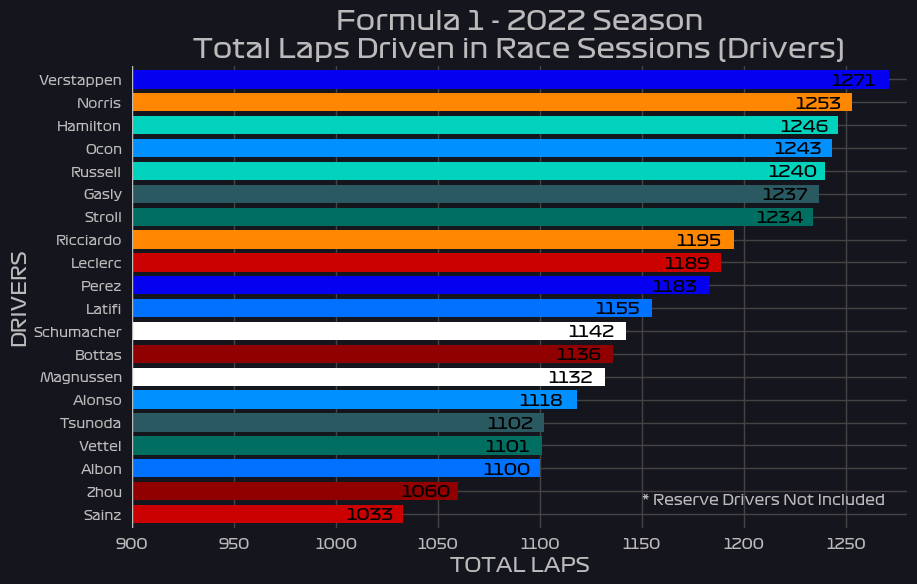

In [44]:
driversTotalLaps = season2022RaceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)[:20]
c = assign_color('drivers', driversTotalLaps.index)
plt.figure(figsize=(10,6))
plt.axis([900,1280,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalLaps.index], driversTotalLaps, color=c)
for i in range(len(driversTotalLaps)):
    plt.text(driversTotalLaps[i]-28, i+0.25, driversTotalLaps[i], fontsize=12, fontweight='bold', color='k')
plt.text(1150, 18.6, "* Reserve Drivers Not Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2022 Season\nTotal Laps Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold', 
          color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(900, color='#bbbbbb')
plt.show()

From this visual, this shows that our champion Verstappen is also **at the top of list** for total laps driven in all race sessions of 2022 Season, with 1271 laps. Then, McLaren driver **Norris** comes after him by just **18 laps less**.

Hamilton and Russell's total driven laps are **nearly identical** (1246 vs 1240). **Ocon**, by the way, got sandwiched between there two Mercedes drivers, with equal 3-lap gaps. The other two drivers who achieved to driver more than 1200 laps are **Gasly** and **Stroll**.

Om the other hand, unfortunately, we see **Sainz** has taken the bottom for this kind of stat; he was stuck at **1033 total laps**, due to having high number of DNFs this season and perhaps, few of them occurred on the first lap! Just one place above, the rookie **Guanyu Zhou** is also far behind other drivers, which is 1060 laps totally. Meanwhile, total number of laps between three drivers **Tsunoda**, **Vettel** and **Albon** are so much close, separated by only 1 lap.

If we merge the total laps driven for all drivers **into teams**, then what is the outcome? The visual below will give us the answer...

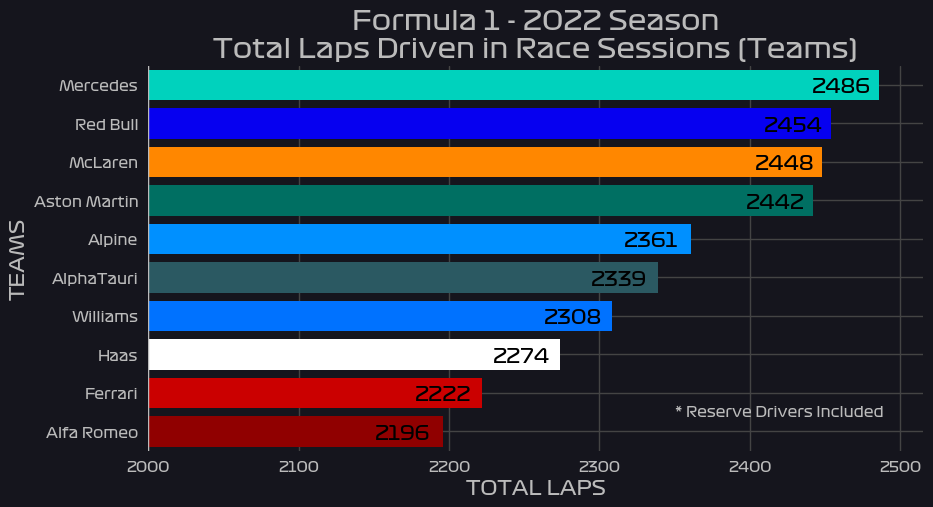

In [45]:
teamsTotalLaps = season2022RaceResults.groupby('Team')['Laps'].sum().sort_values(ascending=False)
c = assign_color('teams', teamsTotalLaps.index)
plt.figure(figsize=(10,5))
plt.axis([2000,2515,9.5,-0.5])
teamLabel = [" ".join(team.split()[:2]) if len(team.split()) > 2 else team.split()[0] for team in teamsTotalLaps.index]
plt.barh(teamLabel, teamsTotalLaps, color=c)
for i in range(len(teamsTotalLaps)):
    plt.text(teamsTotalLaps[i]-45, i+0.2, teamsTotalLaps[i], fontsize=14, fontweight='bold', color='k')
plt.text(2350, 8.6, "* Reserve Drivers Included", fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2022 Season\nTotal Laps Driven in Race Sessions (Teams)', fontsize=19, fontweight='bold', 
           color='#bbbbbb')
plt.xlabel('TOTAL LAPS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('TEAMS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(2000, color='#bbbbbb')
plt.show()

Here, **Mercedes** is in the lead for total laps driven, which is **2486 laps** in all race sessions. This could be a supporting fact that their car might be the most durable than others! Champion of the constructors, Red Bull is the runner-up, following the German team by **32 total laps behind**. Then, McLaren and Aston Martin are pursuing the Milton Keynes-based team, with again equal gaps (2454 vs 2448 vs 2442).

If we observe the last three teams here, these are all **Ferrari-powered** teams, including Scuderia Ferrari itself! Well, general speaking, it is disappointing to see why these teams have fallen behind their rivals in terms of total race laps; besides driving mistakes, is this really pointing out that Ferrari had the least durability during race sessions in 2022?

Anyway, moving back to drivers, let's reveal one more fact similar to total laps driven. This time, **total distance driven** in all race sessions. They are all carefully calculated by taking each driver's lap counts multiplied by the circuit length (kilometers) for each track. And the visual below has fulfilled the purpose:

In [46]:
trackDistance = season2022RaceCalendar['Circuit Length(km)'].values
drivers = season2022RaceResults['Driver'].unique()
driversLaps = {}
for driver in drivers:
    driversLaps[driver] = season2022RaceResults[season2022RaceResults['Driver'] == driver]['Laps'].values
for _ in range(2):    driversLaps['Sebastian Vettel'] = np.insert(driversLaps['Sebastian Vettel'], 0, 0)
for _ in range(20):   driversLaps['Nico Hulkenberg'] = np.append(driversLaps['Nico Hulkenberg'], 0)
for _ in range(15):   driversLaps['Nyck De Vries'] = np.insert(driversLaps['Nyck De Vries'], 0, 0)
for _ in range(6):    driversLaps['Nyck De Vries'] = np.append(driversLaps['Nyck De Vries'], 0)
driversLaps['Alexander Albon'] = np.insert(driversLaps['Alexander Albon'], 15, 0)
driversDist = {}
for driver in driversLaps.keys():
    driversDist[driver] = round((driversLaps[driver] * trackDistance).sum(), 2)
driversTotalDist = pd.Series(driversDist).sort_values(ascending=False)[:20]

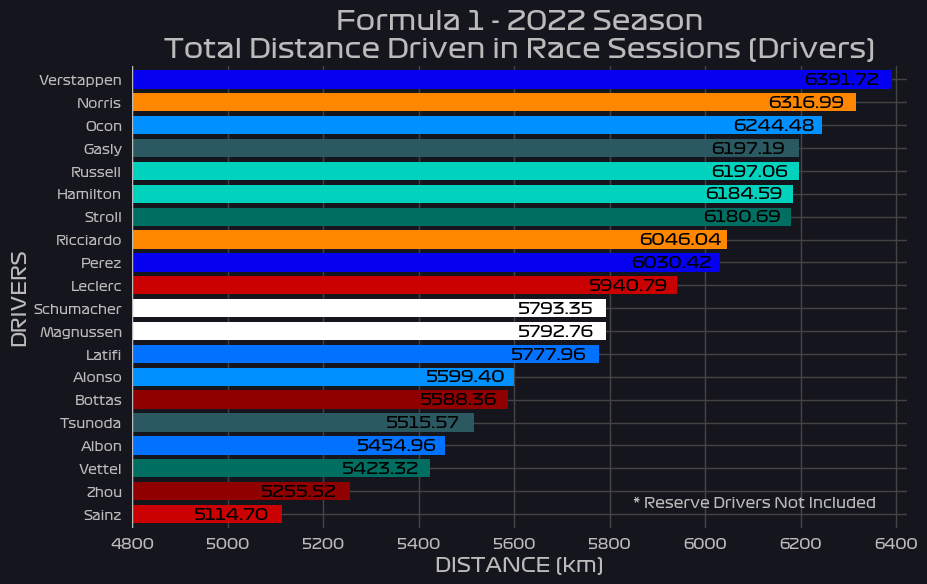

In [47]:
c = assign_color('drivers', driversTotalDist.index)
plt.figure(figsize=(10,6))
plt.axis([4800,6423,19.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in driversTotalDist.index], driversTotalDist, color=c)
for i in range(len(driversTotalDist)):
    plt.text(driversTotalDist[i]-185, i+0.22, "{:4.2f}".format(driversTotalDist[i]), fontsize=12, fontweight='bold', color='k')
plt.text(5850, 18.7, '* Reserve Drivers Not Included', fontweight='bold', color='#bbbbbb')
plt.title('Formula 1 - 2022 Season\nTotal Distance Driven in Race Sessions (Drivers)', fontsize=19, fontweight='bold', 
          color='#bbbbbb')
plt.xlabel('DISTANCE (km)', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('DRIVERS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(4800, color='#bbbbbb')
plt.show()

Yes, Verstappen again became the top driver here, by traveling **6391.72 km** total in all race sessions of 2022 Season! Then, another driver who succeeded to drive over 6300 km is **Lando Norris**, where the Briton was also in 2nd for total laps driven according to the visual above. Ocon, this time, was not sandwhiched between two drivers of same team and individually has taken the 3rd place.

Next, two Mercedes drivers' total driven distances are so close to each other, which is about **12.5 km**. But interestingly, the most identical distance driven was achieved by Haas drivers, where their gaps were limited to **less than 1 km**! Moreover, among the drivers of this visual, **Gasly** and **Russell** had the smallest gap for distance driven, just **0.13 km!**

Similarly, Carlos Sainz is also at the bottom here; he only drove **5114.70 km** in all race sessions, more than a thousand km less than the top! One place above, we encounter Zhou again with 5255.52 km. Among these three drivers, Tsunoda, Albon and Vettel, whose total driven laps were separated by 1 lap according to the previous visual, Tsunoda got ahead of the rest with more than 5500 km.

## Discussions for 2023 Season

**Well, we are approaching to the end of the analyses. Surely, I hope that you've gained lots of insights about how 2022 season progressed and concluded with regards to many aspects and drivers' and teams' perspectives! At this point, it is convenient to give our final verdicts and discuss the expectations for 2023 Season:**

* Without a doubt, **Red Bull** had a wonderful season to take the crown for Constructors Standings (their last one came from 2013) and ended Mercedes' domination after 8 years! At the same time, **Max Verstappen** showed his superiority throughout the season to get another Drivers Championship title, as proved with the analyses above! With the Dutchman, Checo Perez, and their superb F1 car, of course Milton Keynes-headquartered team would like to continue to achieve more in the new era to write the history of their own in F1.
* **Ferrari** had a wonderful start in the first few opening races of the season, thanks to Charles Leclerc's superb driving, resulted in **two wins, three podiums and three fastest laps**; plus Carlos Sainz's great help throughout all the races possible, where the Spaniard successfully claimed the maiden pole position and win this season! However, as the time advanced, things have turned against the team, such as car durability issues, erroneous driving, misconceptions between the drivers and race engineers for strategies in the middle of the races, thus they have fallen behind Red Bull and Verstappen afterwards. Nevertheless, Leclerc and Ferrari finished 2nd in both standings at the end. Hopefully, we'll see the Prancing Horse to be more competitive and come back for more wins to make all the Tifosis happy in 2023.
* About **Mercedes**, they completed the season with only one win and one pole position (both of them came from George Russell). Similarly, it was regrettable to see Lewis Hamilton to not score any win and any pole position in all 22 races, which was something the Briton did not experience in his whole F1 career! On the other side, the German team concluded this season by staying behind Red Bull and Ferrari, after their **8-consecutive-season long** Constructors Championship title. We believe that they'll make their car in the new era better with all aspects, and for this purpose, they'll want to pursue getting new wins and extend their acheivements again with the same driver squad.
* **Alpine** can be considered as the **best team of the rest** if we exclude the top three. Despite scoring no podiums amongst all races, they've had solid consistency overall by obtaining points in most of the races. More interestingly, the Frenchman **Esteban Ocon** has finished the season **ahead of his veteran teammate** Fernando Alonso by 11 points (92 vs 81)! In the end, as Alonso departed from the team, another French driver **Pierre Gasly** has joined for 2023 Season. Now, we can imply that there will be **a full-fledged French team** to compete in F1, such as the originality of the team is French, the main drivers are French and their engine supplier is French _(Renault),_ with hopes that they'll do better than previously.
* **McLaren** fought with Alpine mostly throughout the season, but in the end, they finished 14 points behind the French team (173 vs 159). About the drivers, Lando Norris had one of the strongest season in his career by becoming another driver to score over 100 points, including a podium from Emilia Romagna GP. Daniel Ricciardo, on the other hand, finished the season too far behind, only scoring roughly one-third of the points compared to the British driver. Often times, he had challenges with the car, plus some trustworthy issues. That's why it was the right decision for him to leave the team earlier, even there was one more year contract available. Now, we know that the Australian joined Red Bull back as **the reserve driver** where he became Verstappen's teammate before. For the preparation of the next season, the orange team has agreed to go to races with **Oscar Piastri** who is another Australian and already known for becoming F3 and F2 champion previously and refused to join Alpine through the controversies! We wonder how we will show his performance against Norris and other rivals.
* Now, let's talk about **Alfa Romeo**. It is possible to state that they started this season with decent points, thanks to great driving performed by Valtteri Bottas, staying **in the top ten seven times** among the first 10 races. However, the setbacks they received and less competitiveness afterwardso overall really put them behind as the season progressed, but at least they defended the 6th place in Constructors Standings until the last race! In addition, **Guanyu Zhou** performed pretty well in his rookie season and sometimes he was able to outqualify and outrace his teammate. Thus, he deserved to race with the Swiss-Italian team for the next season, an evidence that good confidence was built between the team and the Chinese driver mutually. 
* Next, **Aston Martin** concluded the season as the 7th best team; of course, they've pefromed good struggles against other similar teams in the grid, but their best race result was 6th place, which wasn't sufficient for stepping on podiums in all races. Well, believe it or not, it was **Sebastian Vettel's last season** in his F1 career. When he announced his retirement in the middle of this season, we were all quite upset to no longer see such a great driver, not matter you loved him or hated him! All we can wish is good luck for the rest of his life and with high expectations, we hope to see him around the tracks or even other motorsports events. As a consequence, if a world champion driver was gone, then another world champion driver will come. Yep, **Fernando Alonso** declared that he will join the British team for 2023 Season to chase for new accomplishments together with Lance Stroll, after his two years with Alpine.
* About **Haas**, it was good to see the team back in the points similar to their few previous seasons, **after having a completely pointless season** in 2021! Although efforts have been made by Kevin Magnussen and Mick Schumacher, the overall car strength was not enough to compete with other teams in the midfield in order to stay higher. Moreover, encountering young Schumacher to gain points in two different races was quite important feat, but the American-based team did not want him for the next season. Instead, he's been replaced by another German driver **Nico Hulkenberg** who has already had over 100 Grands Prix starts (but his podium-less career continues). Let's see if him and Magnussen can have a good friendship and forget about all the old grudges they got in the past.
* **AlphaTauri** has completed the season in 9th place and just two points behind Haas. Well, on the one hand, that seems to be a reasonable result for the backmarker team, but on the other hand, they could have performed better against the teams from the midfield group. After Pierre Gasly left the Faenza-based team, we're going to see another Dutch driver, **Nyck De Vries** in the grid, where he's known for winning Formula E championship title a few years ago and, remember the anaylses above, he successfully finished the one-off race in Italy with points. Yuki Tsunoda, by the way, will stay with the team for 3rd consecutive year, although he finished this season behind Gasly. Accept it or not, the Japanese driver often presented us good drives in some races with such slow pace car like this. 
* It was sad to see **Williams** to finish at the bottom of the Constructors Standings, with only 8 points! Despite their under-performing car, we saw **Alex Albon** doing exceptional jobs in some races to make the team proud, while at the same time, raising his own reputation by showing off his skills in these such races to attract other teams for the future. At the end of 2022 Season, it was time to say goodbye to Nicholas Latifi (should we call him **Goatifi**?) after having three years with the team, later announched by himself that the Canadian will take a break for racing and continue his life for education and pursue for MBA degree. For the next season, a new rookie will take place in the team, that is **Logan Sargeant** the American (we haven't seen one since 2015), having the right to race in full-season long calendar, by accumulating enough points in Formula 2 to obtain his superlicense.

### How's 2023 Season Progressing?

_At the time of the release of these analyses, we've already started the second half of 2023 Season;_ that is, there has already been **14 completed races** so far! Though, this could've have been 15; however, in May, **the race in Imola was ruled out** due to **excessive flooding** in the town nearby and this also badly affected the facilities and the tarmac of Imola circuit! As a consequence, it was impossible to organize the race weekend there, but let's see whether or not it might be added to the race calendar again should the timing and conditions are fine.

_Anyway, let's spill the words about how we've concluded the first half of F1 2023 Season:_ 

It's one-hundred percent doubtless that **Max Verstappen** and **Red Bull** are dominating the season, by leading both Drivers and Constructors Championship by very large point gaps! Those 10 of the race wins came from the Dutchman while the rest were from Sergio Perez (Saudi Arabia & Azerbaijan)! In terms of career win counts, Verstappen has overtaken the Brazilian legend **Ayrton Senna (41)** and placed 5th in F1 career wins of all time! Moreover, there are already more than 100 points of gap between him and Perez, altough the Mexican is in the 2nd place of Drivers Standings of 2023 Season. To be honest, most of the people think that **Verstappen will take the championship title for the 3rd consecutive time** and it is getting boring to see Red Bull to triumph in all race weekends! Could this change a bit for the rest of the races and come across different drivers and teams in their favors to step on the top of the podium?

Together with that, the most leap-forward progression came from **Astom Martin** team, where in the first few races they looked like the 2nd best team of the season, even challenged against the top teams and they achieved that thanks to double world champion **Fernando Alonso** who earned several consecutive podiums with this team and an important milestone to reach **100 career podiums**, despite **being more than 40 years old!** We believe that he's still hunger for new achievements and did not lose his passion for racing in F1 for the years to come; more importantly, will he be able to get **33rd career race win** this season? At the time, he's in the 3rd place of Drivers Standings, while his teammate Lance Stroll got far behind in the standings, compared to the veteran.

About **Mercedes**, they seem to have similar performance as in 2022 and they stepped on the podium ceremony several times with Lewis Hamilton and George Russell (2nd place was their best result), plus a single pole position from Hungary. The 7-time world champion **Hamilton** (who's P4 in Drivers Standings) believes that he will continue racing with the German team if they still keep pushing for car development in the new era and make another contract for the upcoming years when the conditions are agreed. Similar to Alonso, he also did not lose his faith for racing in F1 and for this reason, he'd like to see the team in the top again, face new challenges and add new race wins, titles and achievements.

For **Ferrari**, their campaign in 2023 continues with many ups and downs. Despite a few podiums and pole position in Azerbaijan earned by **Leclerc**, himself and his teammate **Sainz** could not deliver the expected performance adequately! In addition, these setbacks came from false race strategies, wrong tyre choices and sometimes slow pit stops, making them fall behind the rivals in the championship, which altogether cause all the Tifosi disappointed! If they cannot come back stronger for the second half of the season and cannot make up for the losses they had, it is certain that year 2023 will be another one as a lost season for the Italian team.

Besides, another remarkable progression was carried out by **McLaren**. The orange papaya team achieved to **score lots of points in the last three** races which was several fold the points they earned from the first nine races! There, Lando Norris achieved to get on the podium by placing 2nd in Great Britain and Hungary, plus Oscar Piastri performed pretty well in these races of his rookie season. Furthermore, he became the first drivers in the last ten years to lead a race, even though this was from the Sprint race of Belgium! We shall see if they sustain the trend to compete with the top teams and bring back the glories they had in the past.

Lastly, **Nyck De Vries**'s contract in AlphaTauri was terminated after first 10 races, although he got the opportunity to compete in a full season of F1, but his poor performance against teammate Yuki Tsunoda and earning none of the points forced Red Bull's sister team re-think about it and consequenly, he got replaced by multiple Grand Prix winner, Honey Badger... yeah, you guessed that right, **Daniel Ricciardo** to stay in the grid for the rest of the season. It is great to see the Australian to get back in the seat of an F1 car to show his mettle and he knows the team pretty well (because he had raced for them in 2012 and 2013 Season, the time it was called Toro Rosso). Can he fulfill the expectations with this team by his competitive pace and scoring points regularly and by showing his performance throughout the races overall, will he earn the right to move back to Red Bull as a full-time driver for the next seasons? These are the questions in our mind.

**UPDATE 1:** The second half of 2023 Season has been started with Dutch GP. The championship leader Max Verstappen obtained the pole position and took the win in his home race, even there were red flags and mixed dry-wet conditions! This win was very meaningful in the way that he reached the **nine consecutive race wins** record, matching Sebastian Vettel.

**UPDATE 2:** Additionally in Dutch GP, Daniel Ricciardo has broken his wrist bone during after an accident caused by himself int the practice sessions, unfortunately. As stated from the hospital, he will not be able to continue racing until the broken bone is completely recovered; that's why AlphaTauri's reserve driver **Liam Lawson** got the chance for F1 debut.

**UPDATE 3:** Mercedes announced that their drivers Lewis Hamilton and George Russell will stay in the team **until the end of 2025 season.** That means we're going to see the British duo together for at least 50 Grands Prix, meanwhile Hamilton will be on the quest for chasing the 8th world championship title!

**UPDATE 4:** After Italy GP has been held in Monza circuit, Max Verstappen continued to write history in F1! Although Carlos Sainz started the race on pole, the Dutchman again showed everyone that he was unbeatable! In conclusion, he's reached **10 wins in a row** which was a new record he seized right now, beating Sebastian Vettel! Likewise, Red Bull team sustained winning races, increasing their streak to **15 wins** that no other teams have achieved before!

### And for us as spectators...

It is magnificent to see lots of spectators taking part in the grandstands in almost all race tracks organized so far this season, such as the people supporting their favorite drivers and teams by wearing their caps and shirts. Plus, more noticeably, **the Orange Army** for supporting Verstappen! Whenever the number was announced, it is unbelievable that we could see 300,000 or 400,000 spectators coming to watch all F1 action live for the whole weekend!

Of course, if you don't want to limit yourself by just watching the races live or on TV or from Internet, you still have the chance, for instance, to watch some series for incidents occurred in details among the races from previous seasobs, from **Drive to Survive** in Netflix. For gaming, grab a steering wheel, a racing seat, a big monitor and begin playing **F1 23** (by EA Sports and Codemasters) on PC or console! Over and above, if you'd like to manage a team, direct the car development and tell your drivers what to do like a race engineer in all sessions of a race weekend for victory, then **F1 Manager 23** (by Frontier Developments) will be a great choice to spend several hours!

## All right ,that's all everyone! Thank you very much for reading the analyses, and always stay with Formula 1!